# Preparation

## Imports

In [3]:
import pandas as pd

### Import Databases

URLs

In [ ]:
# url_orders = 'https://drive.google.com/file/d/1PYVctzTuLLrWxk5z9FlKpcNWfDBdj0nF/view?usp=sharing'
# url_orderlines = 'https://drive.google.com/file/d/1datH-tCM-ukVjbpOXCOU-6LezwBxpQFq/view?usp=sharing'
# url_products = 'https://drive.google.com/file/d/1LRakHbcAKobUJNUbKBjlbjBb3jbXPYKT/view?usp=sharing'
# url_brands = 'https://drive.google.com/file/d/1SBX5q-z6_WluDhln1Z9tFqiEAjfVF8ml/view?usp=sharing'

Paths

In [ ]:
# path_orders = 'https://drive.google.com/uc?export=download&id='+url_orders.split('/')[-2]
# path_orderlines = 'https://drive.google.com/uc?export=download&id='+url_orderlines.split('/')[-2]
# path_products = 'https://drive.google.com/uc?export=download&id='+url_products.split('/')[-2]
# path_brands = 'https://drive.google.com/uc?export=download&id='+url_brands.split('/')[-2]

In [8]:
path_orders = 'Eniac_Data/orders.csv'
path_orderlines = 'Eniac_Data/orderlines.csv'
path_products = 'Eniac_Data/products.csv'
path_brands = 'Eniac_Data/brands.csv'

Read CSVs

In [9]:
orders_df_original = pd.read_csv(path_orders)
orderlines_df_original = pd.read_csv(path_orderlines)
products_df_original = pd.read_csv(path_products)
brands_df_original = pd.read_csv(path_brands)

Copy Databases

In [10]:
orders_df = orders_df_original.copy()
orderlines_df = orderlines_df_original.copy()
products_df = products_df_original.copy()
brands_df = brands_df_original.copy()

## Databases Exploration

### orders.csv

**Every row in this file represents an order.**

- order_id – a unique identifier for each order
- created_date – a timestamp for when the order was created
- total_paid – the total amount paid by the customer for this order, in euros
- state
  - “Shopping Basket” – products have been placed in the shopping basket
  - “Place Order” – the order has been placed, but is awaiting shipment details
  - “Pending” – the order is awaiting payment confirmation
  - “Completed” – the order has been placed and paid, and the transaction is completed.
  - “Cancelled” – the order has been cancelled and the payment returned to the customer.

In [11]:
print('Orders Shape: ', orders_df.shape)
print(orders_df.info(), '\n')

Orders Shape:  (226909, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226909 entries, 0 to 226908
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   order_id      226909 non-null  int64  
 1   created_date  226909 non-null  object 
 2   total_paid    226904 non-null  float64
 3   state         226909 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 6.9+ MB
None 



In [12]:
orders_df

,order_id,created_date,total_paid,state
0,241319,2017-01-02 13:35:40,44.99,Cancelled
1,241423,2017-11-06 13:10:02,136.15,Completed
2,242832,2017-12-31 17:40:03,15.76,Completed
3,243330,2017-02-16 10:59:38,84.98,Completed
4,243784,2017-11-24 13:35:19,157.86,Cancelled
...,...,...,...,...
226904,527397,2018-03-14 13:56:38,42.99,Place Order
226905,527398,2018-03-14 13:57:25,42.99,Shopping Basket
226906,527399,2018-03-14 13:57:34,141.58,Shopping Basket
226907,527400,2018-03-14 13:57:41,19.98,Shopping Basket


In [ ]:
orders_df.describe()

,order_id,total_paid
count,226909.000000,226904.000000
mean,413296.482480,569.225818
std,65919.250331,1761.778002
min,241319.000000,0.000000
25%,356263.000000,34.190000
50%,413040.000000,112.990000
75%,470553.000000,525.980000
max,527401.000000,214747.530000


In [ ]:
orders_df.nunique()

,0
order_id,226909
created_date,224828
total_paid,31236
state,5


In [ ]:
orders_df.isna().sum()

,0
order_id,0
created_date,0
total_paid,5
state,0


In [ ]:
orders_df.duplicated().sum()

np.int64(0)

### orderlines.csv

**Every row represents each one of the different products involved in an order.**

- id – a unique identifier for each row in this file
  - May not be useful at all, since it doesn't have connection to any other table
- id_order – corresponds to orders.order_id
  - It may be repeated, since an order may have many products bought at once
- product_id – an old identifier for each product, nowadays not in use
- product_quantity – how many units of that product were purchased on that order
  - There are some values that are extremely high. Strangely high
- sku – stock keeping unit: a unique identifier for each product
- unit_price – the unitary price (in euros) of each product at the moment of placing that order
  - actual price paid by the customer for that product in a specific order.
- date – timestamp for the processing of that product

In [ ]:
print('Order Lines Shape: ', orderlines_df.shape)
print(orderlines_df.info(), '\n')

Order Lines Shape:  (293983, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293983 entries, 0 to 293982
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                293983 non-null  int64 
 1   id_order          293983 non-null  int64 
 2   product_id        293983 non-null  int64 
 3   product_quantity  293983 non-null  int64 
 4   sku               293983 non-null  object
 5   unit_price        293983 non-null  object
 6   date              293983 non-null  object
dtypes: int64(4), object(3)
memory usage: 15.7+ MB
None 



In [ ]:
orderlines_df

,id,id_order,product_id,product_quantity,sku,unit_price,date
0,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19
1,1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45
2,1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57
3,1119112,299542,0,1,WDT0315,68.39,2017-01-01 00:51:40
4,1119113,299543,0,1,JBL0104,23.74,2017-01-01 01:06:38
...,...,...,...,...,...,...,...
293978,1650199,527398,0,1,JBL0122,42.99,2018-03-14 13:57:25
293979,1650200,527399,0,1,PAC0653,141.58,2018-03-14 13:57:34
293980,1650201,527400,0,2,APP0698,9.99,2018-03-14 13:57:41
293981,1650202,527388,0,1,BEZ0204,19.99,2018-03-14 13:58:01


In [ ]:
orderlines_df.describe()

,id,id_order,product_id,product_quantity
count,2.939830e+05,293983.000000,293983.0,293983.000000
mean,1.397918e+06,419999.116544,0.0,1.121126
std,1.530096e+05,66344.486479,0.0,3.396569
min,1.119109e+06,241319.000000,0.0,1.000000
25%,1.262542e+06,362258.500000,0.0,1.000000
50%,1.406940e+06,425956.000000,0.0,1.000000
75%,1.531322e+06,478657.000000,0.0,1.000000
max,1.650203e+06,527401.000000,0.0,999.000000


In [ ]:
orderlines_df.nunique()

,0
id,293983
id_order,204855
product_id,1
product_quantity,67
sku,7951
unit_price,11329
date,251631


In [ ]:
orderlines_df.isna().sum()

,0
id,0
id_order,0
product_id,0
product_quantity,0
sku,0
unit_price,0
date,0


In [ ]:
orderlines_df.duplicated().sum()

np.int64(0)

### products.csv
- sku – stock keeping unit: a unique identifier for each product
- name – product name
- desc – product description
- price – base price of the product, in euros
  - Think of it as the list price or RRP (Recommended Retail Price) that a product is normally sold at, before any promotions or discounts are applied.
- promo_price – promotional price, in euros
  - the discounted price currently available (e.g., during a sale).
- in_stock – whether or not the product was in stock at the moment of the data extraction
- type – a numerical code for product type

In [ ]:
print('Products Shape: ', products_df.shape)
print(products_df.info(), '\n')

Products Shape:  (19326, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19326 entries, 0 to 19325
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   sku          19326 non-null  object
 1   name         19326 non-null  object
 2   desc         19319 non-null  object
 3   price        19280 non-null  object
 4   promo_price  19326 non-null  object
 5   in_stock     19326 non-null  int64 
 6   type         19276 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.0+ MB
None 



In [ ]:
products_df

,sku,name,desc,price,promo_price,in_stock,type
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,499.899,1,8696
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59,589.996,0,13855401
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59,569.898,0,1387
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25,229.997,0,1230
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,31.99,1,1364
...,...,...,...,...,...,...,...
19321,BEL0376,Belkin Travel Support Apple Watch Black,compact and portable stand vertically or horiz...,29.99,269.903,1,12282
19322,THU0060,"Enroute Thule 14L Backpack MacBook 13 ""Black",Backpack with capacity of 14 liter compartment...,69.95,649.903,1,1392
19323,THU0061,"Enroute Thule 14L Backpack MacBook 13 ""Blue",Backpack with capacity of 14 liter compartment...,69.95,649.903,1,1392
19324,THU0062,"Enroute Thule 14L Backpack MacBook 13 ""Red",Backpack with capacity of 14 liter compartment...,69.95,649.903,0,1392


In [ ]:
products_df.describe()

,in_stock
count,19326.000000
mean,0.109593
std,0.312390
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [ ]:
products_df.nunique()

,0
sku,10579
name,10373
desc,7098
price,2690
promo_price,4614
in_stock,2
type,126


In [ ]:
products_df.isna().sum()

,0
sku,0
name,0
desc,7
price,46
promo_price,0
in_stock,0
type,50


In [ ]:
products_df.duplicated().sum()

np.int64(8746)

### brands.csv
- short – the 3-character code by which the brand can be identified in the first 3 characters of products.sku
- long – brand name

In [ ]:
print('Brands Shape: ', brands_df.shape)
print(brands_df.info(), '\n')

Brands Shape:  (187, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   short   187 non-null    object
 1   long    187 non-null    object
dtypes: object(2)
memory usage: 3.1+ KB
None 



In [ ]:
brands_df

,short,long
0,8MO,8Mobility
1,ACM,Acme
2,ADN,Adonit
3,AII,Aiino
4,AKI,Akitio
...,...,...
182,XOO,Xoopar
183,XRI,X-Rite
184,XTO,Xtorm
185,ZAG,ZaggKeys


In [ ]:
brands_df.describe()

,short,long
count,187,187
unique,187,181
top,8MO,Apple
freq,1,2


In [ ]:
brands_df.nunique()

,0
short,187
long,181


In [ ]:
brands_df.isna().sum()

,0
short,0
long,0


In [ ]:
brands_df.duplicated().sum()

np.int64(0)

## Data Cleaning

In [ ]:
orders_cl = orders_df.copy()
orderlines_cl = orderlines_df.copy()
products_cl = products_df.copy()
brands_cl = brands_df.copy()

### Orders

Missing Values

In [ ]:
print(f"5 missing values represents {((orders_df.total_paid.isna().sum() / orders_df.shape[0])*100).round(5)}% of the rows in our DataFrame")

5 missing values represents 0.0022% of the rows in our DataFrame


As there is such a tiny amount of missing values, we will simply delete these rows, as we have enough data without them.

In [ ]:
orders_cl = orders_cl.loc[~orders_cl.total_paid.isna(), :]

* `created_date` should become datetime datatype

In [ ]:
orders_cl["created_date"] = pd.to_datetime(orders_cl["created_date"])

### Orderlines

* `date` should be a datetime datatype
* `unit_price` should be a float datatype

#### Date

In [ ]:
orderlines_cl["date"] = pd.to_datetime(orderlines_cl["date"])

#### Unit Price

In [ ]:
 orderlines_cl.unit_price.str.contains("\d+\.\d+\.\d+").value_counts()

,count
unit_price,
False,257814
True,36169


Looks like over 36000 rows in `orderlines` are affected by this problem. Let's work out how much that is as a percentage of our total data.

In [ ]:
two_dot_percentage = ((orderlines_cl.unit_price.str.contains("\d+\.\d+\.\d+").value_counts()[1] / orderlines_cl.shape[0])*100).round(2)
print(f"The 2 dot problem represents {two_dot_percentage}% of the rows in our DataFrame")

The 2 dot problem represents 12.3% of the rows in our DataFrame


<ipython-input-36-7c315d45906a>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  two_dot_percentage = ((orderlines_cl.unit_price.str.contains("\d+\.\d+\.\d+").value_counts()[1] / orderlines_cl.shape[0])*100).round(2)


This is a bit of a tricky decision as 12.3% is a significant amount of our data... and we might even end up losing a larger portion of our data than this too. For the moment we will delete the rows as we only have 2 weeks for this project and I'd like some quick, accurate results to show. If we have time at the end, we can come back and investigate this problem further, maybe there's a solution?

Each row of `orderlines` represents a product in an order. For example, if order number 175 containe…uld have 3 rows in `orderlines`, one row for each of the products. If 2 of those products have 'normal' prices (14.99, 15.85) and 1 has a price with 2 decimal points (1.137.99), we need to remove the whole order and not just the affected row. If we only remove the row with 2 decimal places then any later analysis about products and prices could be misleading.

We therefore need to find the order numbers associated with the rows that have 2 decimal points, and then remove all the associated rows.

In [ ]:
two_dot_order_ids_list = orderlines_cl.loc[orderlines_cl.unit_price.str.contains("\d+\.\d+\.\d+"), "id_order"]

orderlines_cl = orderlines_cl.loc[~orderlines_cl.id_order.isin(two_dot_order_ids_list)]

We still have 216250 rows in orderlines to work with. This should be more than enough for our evaluation.

Now that all of the 2 decimal point prices have been removed, let's try again to convert the column `unit_price` to the correct datatype.

In [ ]:
orderlines_cl["unit_price"] = pd.to_numeric(orderlines_cl["unit_price"])

### Products

In [ ]:
products_cl = products_cl.drop_duplicates()
products_cl

,sku,name,desc,price,promo_price,in_stock,type
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,499.899,1,8696
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59,589.996,0,13855401
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59,569.898,0,1387
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25,229.997,0,1230
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,31.99,1,1364
...,...,...,...,...,...,...,...
19321,BEL0376,Belkin Travel Support Apple Watch Black,compact and portable stand vertically or horiz...,29.99,269.903,1,12282
19322,THU0060,"Enroute Thule 14L Backpack MacBook 13 ""Black",Backpack with capacity of 14 liter compartment...,69.95,649.903,1,1392
19323,THU0061,"Enroute Thule 14L Backpack MacBook 13 ""Blue",Backpack with capacity of 14 liter compartment...,69.95,649.903,1,1392
19324,THU0062,"Enroute Thule 14L Backpack MacBook 13 ""Red",Backpack with capacity of 14 liter compartment...,69.95,649.903,0,1392


In [ ]:
products_cl.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10580 entries, 0 to 19325
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   sku          10580 non-null  object
 1   name         10580 non-null  object
 2   desc         10573 non-null  object
 3   price        10534 non-null  object
 4   promo_price  10580 non-null  object
 5   in_stock     10580 non-null  int64 
 6   type         10530 non-null  object
dtypes: int64(1), object(6)
memory usage: 661.2+ KB


#### Missing Values

In [ ]:
products_cl["desc"].isna().sum()

np.int64(7)

7 is a very small number to have missing, let's have a closer look

In [ ]:
products_cl.loc[products_cl['desc'].isna(), :]

,sku,name,desc,price,promo_price,in_stock,type
16126,WDT0211-A,"Open - Purple 2TB WD 35 ""PC Security Mac hard ...",NaN,107,814.659,0,1298
16128,APP1622-A,Open - Apple Smart Keyboard Pro Keyboard Folio...,NaN,1.568.206,1.568.206,0,1298
17843,PAC2334,Synology DS718 + NAS Server | 10GB RAM,NaN,566.35,5.659.896,0,12175397
18152,KAN0034-A,Open - Kanex USB-C Gigabit Ethernet Adapter Ma...,NaN,29.99,237.925,0,1298
18490,HTE0025,Hyper Pearl 1600mAh battery Mini USB Mirror an...,NaN,24.99,22.99,1,1515
18612,OTT0200,OtterBox External Battery Power Pack 20000 mAHr,NaN,79.99,56.99,1,1515
18690,HOW0001-A,Open - Honeywell thermostat Lyric zonificador ...,NaN,199.99,1.441.174,0,11905404


We have 2 choices here:
* We can quickly and easily remove these rows.
* Or, alternatively, the products names here are quite descriptive, so I'm tempted to just copy them to the description column, so that there is a description if we later want utilise this column. I wouldn't recommend this if this DataFrame was the source of truth for our website. But this is not the case here, and we're not faking any information (guessing a price or so), so I'm happy with this option

In [ ]:
products_cl.loc[products_cl['desc'].isna(), 'desc'] = products_cl.loc[products_cl['desc'].isna(), 'name']

In [ ]:
products_cl.loc[products_cl['desc'].isna(), :]

,sku,name,desc,price,promo_price,in_stock,type


##### Price

In [ ]:
products_cl.loc[products_cl['desc'].isna(), :]

,sku,name,desc,price,promo_price,in_stock,type


In [ ]:
print(f"The missing values in price are {(products_cl.price.isna().value_counts(normalize=True)[1] * 100).round(2)}% of all rows in the DataFrame")

The missing values in price are 0.43% of all rows in the DataFrame


<ipython-input-46-ea5c0795b9d1>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"The missing values in price are {(products_cl.price.isna().value_counts(normalize=True)[1] * 100).round(2)}% of all rows in the DataFrame")


Let's simply delete these rows to ensure that we can trust the numbers in our final DataFrame. Afterall, the price is very important when investigating discounts.

In [ ]:
products_cl = products_cl.loc[~products_cl['price'].isna()]
products_cl.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10534 entries, 0 to 19325
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   sku          10534 non-null  object
 1   name         10534 non-null  object
 2   desc         10534 non-null  object
 3   price        10534 non-null  object
 4   promo_price  10534 non-null  object
 5   in_stock     10534 non-null  int64 
 6   type         10484 non-null  object
dtypes: int64(1), object(6)
memory usage: 658.4+ KB


Type isn’t an essential piece of data for the analysis and is therefore allowed to carry missing values. The only place it comes in later is as an optional route to category creation, where someone might still choose to drop the rows with missing values, however one can still use name and desc to categorize those rows.

#### Data Types

We saw from looking at the output of `.info()` that both `price` and `promo_price` have been stored as objects and not as a numerical datatypes. We also saw while solving other problems that both columns have some prices with 3 decimal places and others with 2 decimal points - the latter will prevent us from converting the datatype to numerical, so first we must investigate and solve these problems.

##### Price

In [ ]:
# Convert price column to string for regex checks
price_str = products_cl["price"].astype(str)

# Problem 1: Prices with more than one dot (e.g., '1.137.99')
multiple_dots = price_str.str.contains(r"\d+\.\d+\.\d+")

# Problem 2: Prices with too many decimal places (e.g., '19.999')
too_many_decimals = price_str.str.contains(r"\d+\.\d{3,}")

# Combine both conditions
price_problems_mask = multiple_dots | too_many_decimals

# Count the number of problematic rows
price_problems_number = products_cl.loc[price_problems_mask].shape[0]
price_problems_number

542

In [ ]:
print(f"The column price has in total {price_problems_number} wrong values. This is {round(((price_problems_number / products_cl.shape[0]) * 100), 2)}% of the rows of the DataFrame")

The column price has in total 542 wrong values. This is 5.15% of the rows of the DataFrame


5.15% is a reasonable amount of our data. However, the price column will be important to understanding discounts, so I'd like it to be very trustworthy as we are basing business decisions on it. Therefore, we'll delete these rows

In [ ]:
# Convert prices to string for regex checks
price_str = products_cl["price"].astype(str)

# Condition 1: price does NOT contain multiple dots
valid_decimal_format = price_str.str.count(r"\.") <= 1

# Condition 2: price does NOT have more than 2 decimal places
valid_decimal_places = ~price_str.str.contains(r"\d+\.\d{3,}")

# Combine conditions
valid_prices = valid_decimal_format & valid_decimal_places

# Apply to DataFrame
products_cl = products_cl.loc[valid_prices, :]

To complete our task, let's convert the column to a numeric datatype

In [ ]:
products_cl["price"] = pd.to_numeric(products_cl["price"])
products_cl.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9992 entries, 0 to 19325
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sku          9992 non-null   object 
 1   name         9992 non-null   object 
 2   desc         9992 non-null   object 
 3   price        9992 non-null   float64
 4   promo_price  9992 non-null   object 
 5   in_stock     9992 non-null   int64  
 6   type         9946 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 624.5+ KB


##### Promo Price

Again, let's begin by seeing how many values are affected by the 2-decimal-dots problem, or the 3 decimal-places problem

In [ ]:
promo_problems_number = products_cl.loc[(products_cl.promo_price.astype(str).str.contains("\d+\.\d+\.\d+"))|(products_cl.promo_price.astype(str).str.contains("\d+\.\d{3,}")), :].shape[0]
promo_problems_number

9232

In [ ]:
print(f"The column promo_price has in total {promo_problems_number} wrong values. This is {round(((promo_problems_number / products_cl.shape[0]) * 100), 2)}% of the rows of the DataFrame")

The column promo_price has in total 9232 wrong values. This is 92.39% of the rows of the DataFrame


WOW!!! That's a lot of wrong data. Let's have a quick investigate to check that's correct. We'll make a DataFrame by copy-pasting the code we used above and then look at a large sample to check that all the numbers in the `promo_price` column really have either 2 decimal points or 3 decimal places.

In [ ]:
promo_price_cl = products_cl.loc[(products_cl.promo_price.astype(str).str.contains("\d+\.\d+\.\d+"))|(products_cl.promo_price.astype(str).str.contains("\d+\.\d{3,}")), :]
promo_price_cl.sample(50)

,sku,name,desc,price,promo_price,in_stock,type
16593,APP2329,"Apple MacBook Pro 15 ""i7 2.8GHz Core Touch Bar...",New MacBook Pro 15-inch Touch Bar to 28GHz Cor...,3519.00,3.273.004,0,"1,02E+12"
1241,LIF0042,LifeProof Fre iPhone 6 Black Waterproof Case,waterproof and extreme conditions for iPhone 6...,79.99,599.906,0,11865403
16761,GTE0106,G-Technology G-RAID Thunderbolt Hard Drive 20T...,20TB RAID disk with 2 bays and removable disks...,1358.99,11.099.947,0,11935397
784,LAC0213,LaCie Porsche Design Desktop Drive 3TB USB 3.0...,External Hard Drive 35-inch 3TB USB 3.0 for Ma...,119.99,1.157.934,0,11935397
765,APP0991,Apple Mac Pro 12-core 27GHz | 16GB RAM | 1TB F...,New Mac Pro with 16GB of RAM 12-core GPU 1TB 2...,9689.00,91.135.845,0,1282
16120,AKI0019,Akitio Thunder2 QUAD Case External Thunderbolt 2,Disk outer box 25 inch and 35 inch Thunderbolt...,468.00,4.315.114,0,12995397
18105,PAC2299,Synology DS118 NAS Server | 2TB (1x2TB) WD Red,1 bay NAS server with capacity for home use or...,274.99,2.535.845,0,12175397
3137,ELG0042,EyeTV Netstream 4Sat Elgato,Satellite TV tuner for iPhone iPad and Mac.,199.95,1.999.005,0,11905404
2728,STA0021,Startech HDMI M / M black 1mt,HDMI Cable 1 meter with 2 male ports for Mac.,9.99,6.989,1,1325
313,NTE0014,NewerTech eSATA to USB 3.0 Adapter,High-speed eSATA adapter to USB 3.0.,36.99,259.896,0,1325


So we were correct, over 90% of the data in this column is corrupt. There's no point deleting all of these rows, then we would barely have a products table. Instead, as it's only this column that appears to be very untrustworthy, we will delete the column.

In [ ]:
products_cl = products_cl.drop(columns=["promo_price"])
products_cl.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9992 entries, 0 to 19325
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sku       9992 non-null   object 
 1   name      9992 non-null   object 
 2   desc      9992 non-null   object 
 3   price     9992 non-null   float64
 4   in_stock  9992 non-null   int64  
 5   type      9946 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 546.4+ KB


Obviously, there's now no need to convert `promo_price` to a numerical datatype

Don't forget to download/save your new DataFrames. Also, give them an obvious name, so that you know they are the cleaned version and not the original DataFrame.

In [ ]:
# from google.colab import files

# orders_df.to_csv("orders_cl.csv", index=False)
# files.download("orders_cl.csv")

# orderlines_df.to_csv("orderlines_cl.csv", index=False)
# files.download("orderlines_cl.csv")

# products_cl.to_csv("products_cl.csv", index=False)
# files.download("products_cl.csv")

# # example if using Jupyter Notebook on Browser
# #from IPython.display import FileLink

# #orders_df.to_csv("orders_cl.csv", index=False)
# #FileLink("orders_cl.csv")

### Date Times

As part of the data quality process, we often have to assess and correct that our software interprets the data appropriately.

In the previous notebook, correcting data types helped us to identify errors. It can also help us manipulate data in the correct way: for example, if numbers were stored as objects, then `"2" + "3" = "23"`, whereas if we change it to a numerical datatype, `2 + 3 = 5`.

Changing dates to the `datetime` data type allows us to manipulate and check our data in a similar way. In this notebook, we will learn about this special data type.

Let's have a look at the top 5 rows of the DataFrame.

In [ ]:
orders_cl.head()

,order_id,created_date,total_paid,state
0,241319,2017-01-02 13:35:40,44.99,Cancelled
1,241423,2017-11-06 13:10:02,136.15,Completed
2,242832,2017-12-31 17:40:03,15.76,Completed
3,243330,2017-02-16 10:59:38,84.98,Completed
4,243784,2017-11-24 13:35:19,157.86,Cancelled


#### Converting to datetime

In [ ]:
orders_cl["created_date"] = pd.to_datetime(orders_cl["created_date"])

`.dt` is to datetime what `.str` is to strings. If you have a Series that is of the datetime data type, `.dt` is an accessor that allows you to return datetime properties from the values of the Series. These properties will be indexed the same as the original Series.

Remember, if you select one column from a DataFrame it's a Series.

In [ ]:
single_column = orders_cl["created_date"]

type(single_column)

pandas.core.series.Series

 `.dt` can return many properties from datetime, such as the `.month`

### Quality Assessment

Follow the steps on the platform and use what you've learnt to see how reliable the data is.

Let's create a copy of our DataFrames, to make sure any of our changes won't affect the original DataFrame. We'll also change the DataFrames from `_cl` to `_qu`, so we can distinguish between the data that has been cleaned, and that which has been quality controlled.

In [ ]:
orders_qu = orders_cl.copy()
orderlines_qu = orderlines_cl.copy()
products_qu = products_cl.copy()
brands_qu = brands_cl.copy()

#### Define Pandas display format

In [ ]:
pd.set_option("display.float_format", lambda x: "%.2f" % x)
pd.set_option("display.max_rows", 1000)

#### Exclude unwanted orders

`orders` - Keep only orders with the state you want to work with
No `shopping cart`, `cancelled` etc...

In [ ]:
orders_qu.head()

,order_id,created_date,total_paid,state
0,241319,2017-01-02 13:35:40,44.99,Cancelled
1,241423,2017-11-06 13:10:02,136.15,Completed
2,242832,2017-12-31 17:40:03,15.76,Completed
3,243330,2017-02-16 10:59:38,84.98,Completed
4,243784,2017-11-24 13:35:19,157.86,Cancelled


Let's look at the make up of `state`.

In [ ]:
orders_qu['state'].value_counts()

,count
state,
Shopping Basket,117809
Completed,46605
Place Order,40883
Pending,14374
Cancelled,7233


Seems like an overwhelming amount of the orders are left in the shopping basket - something we'll have to analyse another time. For this task we're interested in only `completed` orders, so let's filter our DataFrame.

In [ ]:
# keep only completed orders
orders_qu = orders_qu.loc[orders_qu.state == "Completed", :]
orders_qu.shape

(46605, 4)

#### Keep only the orders that are present in both `orders` and `orderlines`

Let's begin by looking if there's a big difference between the amount of orders present in `orders` and `orderlines`.

In [ ]:
orders_qu.order_id.nunique()

46605

In [ ]:
orderlines_qu.id_order.nunique()

170213

What a huge difference! We want to make sure that every order_id in `orders` also exists in `orderlines` and vice versa.

Hence we'll perform an inner merge on the two tables using the `order_id` & `id_order`. This will then keep only the `order_id`'s that are present in both tables, which will then help us filter our `_qu` DataFrames once again.

In [ ]:
orders_orderlines = orders_qu.merge(orderlines_qu,
                                    how="inner",
                                    left_on="order_id",
                                    right_on="id_order")

In [ ]:
# order_ids that are in both tables
order_ids = orders_orderlines["order_id"].unique()

In [ ]:
# keep those ids in orders
orders_qu = orders_qu.loc[orders_qu["order_id"].isin(order_ids), :]

# keep those ids in orderlines
orderlines_qu = orderlines_qu.loc[orderlines_qu["id_order"].isin(order_ids), :]

Let's have a quick check to make sure we're filtering both DataFrames the same. They should both contain the same number of unique `order_id`'s.

In [ ]:
orders_qu["order_id"].nunique(), orderlines_qu["id_order"].nunique()

(43064, 43064)

In [ ]:
orders_qu.shape, orderlines_qu.shape

((43064, 4), (56714, 7))

#### Exclude orders with unknown products

Let's start by investigating `orderlines` and `products`. We want to make sure that every product in `orderlines` has a matching entry in `products`. All orders with a missing product need to be removed from both `orderlines` and `orders`.

A left-join can help us here:

Joining `orderlines` left on `products` will keep all orderlines, and add the information of `products` on the matching skus. If an sku has been sold in `orderlines`, but the sku does not have an entry in `products` then the product_name will be empty.

In [ ]:
orderlines_products = orderlines_qu.merge(products_qu, how="left", on = "sku")[["id_order","sku","name" ]]
orderlines_products.sample(10)

,id_order,sku,name
36100,444391,IHE0022,iHealth Wireless Pulse PO3M Oxómetro iPhone
41361,466203,JBL0107,JBL Flip 3 Bluetooth Speaker Black
147,300158,APP1211,Apple TV 64GB media player
48900,494943,BEL0257-A,"Open - Belkin Pleated MacBook Pro 13.3 ""Black"
39745,460070,AP20308,Like new - Apple iPhone SE 128GB Gold
25657,406639,DLK0057,D-Link DCS-825L camera EyeOn Wi-Fi baby monitor
52249,508727,ALL0008,Allocacoc PowerCube Original Regleta White / Blue
12052,353526,SEA0103,"Seagate Barracuda 1TB Hard Drive 25 ""7mm"
7759,322757,MAC0117-A,Open - Macally USB 3.0 External Enclosure 3.5 ...
37744,428083,NEA0010,Netatmo Pluviometer for weather station


We can count how many missing products we have.

In [ ]:
orderlines_products.name.isna().value_counts()

,count
name,
False,55320
True,1394


Looks like the vast majority of products are known.

We can't simply delete the rows containing unknown products. We need to remove the entirety of any order that contains an unknown product to keep a consistent and coherent dataset.

In [ ]:
orders_to_delete = orderlines_products.loc[orderlines_products.name.isna(), "id_order"].unique()
orders_to_delete

array([299638, 299706, 299712, ..., 526106, 526122, 526363])

Keep only orders in `orders` and `orderlines`, that are not in this list of corrupted orders.

In [ ]:
orders_qu = orders_qu.loc[~orders_qu.order_id.isin(orders_to_delete),:]

Let's have a quick check to make sure we're filtering both DataFrames the same. They should both contain the same number of unique `order_id`'s.

In [ ]:
orders_qu["order_id"].nunique(), orderlines_qu["id_order"].nunique()

(41701, 43064)

#### Explore the revenue from different tables

In a consistent and coherent dataset the value of an order should roughly match the sum of all items bought on that order. Let's investigate...

In [ ]:
orderlines_qu_copy = orderlines_qu.copy()
orders_qu_copy = orders_qu.copy()

##### Step 1

Create the `unit_price_total` as `orderlines.unit_price` * `orderlines.product_quantity`

In [ ]:
orderlines_qu_copy["unit_price_total"] = orderlines_qu_copy["product_quantity"] * orderlines_qu_copy["unit_price"]

In [ ]:
orderlines_qu_copy.tail(10)

,id,id_order,product_id,product_quantity,sku,unit_price,date,unit_price_total
293583,1649440,527035,0,1,APP0498,23.00,2018-03-14 11:41:55,23.00
293584,1649441,527034,0,1,APP0927,13.99,2018-03-14 11:42:01,13.99
293586,1649446,527042,0,1,APP0927,13.99,2018-03-14 11:42:38,13.99
293587,1649447,527035,0,1,APP0698,9.99,2018-03-14 11:42:41,9.99
293596,1649468,525664,0,1,TUC0336,7.93,2018-03-14 11:43:59,7.93
293599,1649474,525664,0,1,TUC0207,16.52,2018-03-14 11:45:05,16.52
293616,1649512,527070,0,2,APP0698,9.99,2018-03-14 11:49:01,19.98
293621,1649522,527074,0,2,APP0698,9.99,2018-03-14 11:49:36,19.98
293644,1649565,527096,0,3,APP0698,9.99,2018-03-14 11:54:35,29.97
293661,1649593,527112,0,1,APP0698,9.99,2018-03-14 11:58:13,9.99


##### Step 2

Group by `id_order`, summarising by the sum of `unit_price_total`

In [ ]:
orderlines_order_ids = orderlines_qu_copy.groupby("id_order", as_index=False)["unit_price_total"].sum()
# as_index=False changes the return so that the groupedby column remains a column (not the index)

In [ ]:
orderlines_order_ids

,id_order,unit_price_total
0,241423,129.16
1,242832,10.77
2,243330,77.99
3,245275,149.00
4,245595,105.98
...,...,...
43059,527042,13.99
43060,527070,19.98
43061,527074,19.98
43062,527096,29.97


#### Average difference between `total_paid` and `unit_price_total`?

Let's merge our grouped `orderlines` table with the `orders` table, so we can calculate the differences in prices.

In [ ]:
diff_df = orders_qu_copy.merge(orderlines_order_ids, left_on="order_id", right_on="id_order", how="inner")
diff_df

,order_id,created_date,total_paid,state,id_order,unit_price_total
0,241423,2017-11-06 13:10:02,136.15,Completed,241423,129.16
1,242832,2017-12-31 17:40:03,15.76,Completed,242832,10.77
2,243330,2017-02-16 10:59:38,84.98,Completed,243330,77.99
3,245275,2017-06-28 11:35:37,149.00,Completed,245275,149.00
4,245595,2017-01-21 12:52:47,112.97,Completed,245595,105.98
...,...,...,...,...,...,...
41696,527042,2018-03-14 11:47:50,18.98,Completed,527042,13.99
41697,527070,2018-03-14 11:50:48,24.97,Completed,527070,19.98
41698,527074,2018-03-14 11:51:42,24.97,Completed,527074,19.98
41699,527096,2018-03-14 11:58:40,34.96,Completed,527096,29.97


In [ ]:
diff_df["difference"] = diff_df["total_paid"] - diff_df["unit_price_total"]
diff_df.head(10)

,order_id,created_date,total_paid,state,id_order,unit_price_total,difference
0,241423,2017-11-06 13:10:02,136.15,Completed,241423,129.16,6.99
1,242832,2017-12-31 17:40:03,15.76,Completed,242832,10.77,4.99
2,243330,2017-02-16 10:59:38,84.98,Completed,243330,77.99,6.99
3,245275,2017-06-28 11:35:37,149.00,Completed,245275,149.00,0.00
4,245595,2017-01-21 12:52:47,112.97,Completed,245595,105.98,6.99
5,246405,2017-11-24 10:01:27,407.96,Completed,246405,275.75,132.21
6,247524,2018-01-09 14:21:34,167.98,Completed,247524,162.99,4.99
7,247643,2017-05-26 11:50:35,153.54,Completed,247643,153.54,0.00
8,250275,2017-11-19 22:34:54,54.99,Completed,250275,51.00,3.99
9,251302,2017-05-10 12:27:33,140.99,Completed,251302,140.99,0.00


Now that we know the difference for each order, we can compute the average.

In [ ]:
diff_df.difference.mean().round(2)

np.float64(4.47)

#### Distribution of these differences

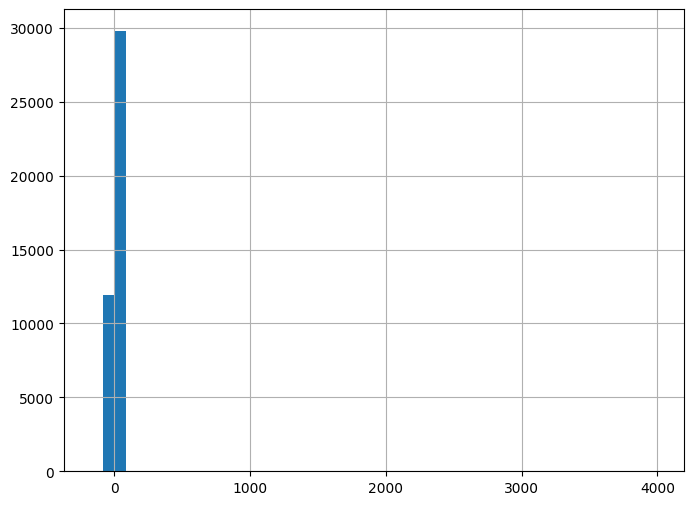

In [ ]:
diff_df.difference.hist(bins= 50, figsize=(8,6));

Looking at the spread of the data above, some of the difference must be due to corruption. Let's use `.describe()` to investigate the distribution further.

In [ ]:
diff_df.difference.describe()

,difference
count,41701.00
mean,4.47
std,26.05
min,-165.00
25%,0.00
50%,4.99
75%,6.99
max,3984.99


We can see from the our quartiles (0.00, 4.99, 6.99) that most of our data fits an expected pattern - free, 4.99, and 6.99 all seem like reasonable prices to assume as postage. However, look at the min and the max values, -165.00 and 3984.99, this can only occur due to corrupted data.

#### Dropping Outliers

There's a rule of thumb, that anything:
+ lower than the 25% quartile - (1.5 x interquartile range), or
+ higher than the 75% quartile + (1.5 x interquartile range)

is an outlier. Let's use this rule to try and exclude any corrupted data.

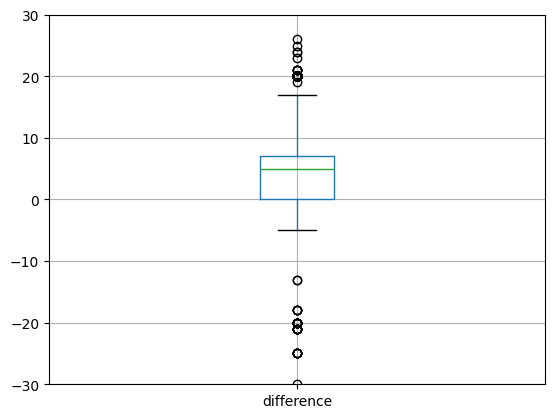

In [ ]:
# We know this rule from the boxplot
import matplotlib.pyplot as plt

ax = diff_df.boxplot("difference");
ax.set_ylim(-30, +30)
plt.show()

In [ ]:
# calculate the quartiles
Q1 = diff_df["difference"].quantile(0.25)
Q3 = diff_df["difference"].quantile(0.75)

Q1, Q3

(np.float64(0.0), np.float64(6.989999999999981))

In [ ]:
# calculate the interquartile range
IQR = Q3-Q1
IQR

np.float64(6.989999999999981)

In [ ]:
# lower boundary
Q1 - 1.5*IQR

np.float64(-10.484999999999971)

In [ ]:
# upper boundary
Q3 + 1.5*IQR

np.float64(17.47499999999995)

In [ ]:
# filter the DataFrame to include only "non-outliers"
diff_no_outliers_df = diff_df.loc[
    (diff_df["difference"] >= (Q1 - 1.5*IQR))
    &
    (diff_df["difference"] <= (Q3 + 1.5*IQR))
    ,
    :]

Let's look at the distribution again to see the effect of removing the outliers.

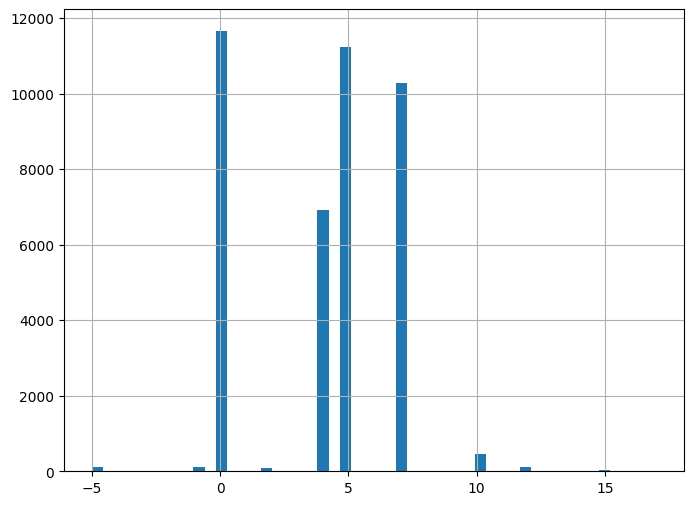

In [ ]:
diff_no_outliers_df.difference.hist(bins= 50, figsize=(8,6));

<Axes: >

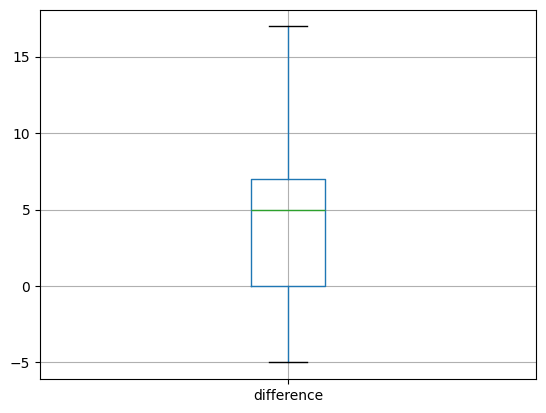

In [ ]:
diff_no_outliers_df.boxplot("difference")

This looks much more like what we would expect: a small difference, but nothing extreme.

Now we need to remove these orders with extreme differences from our `orders_lines_merged` DataFrame.

In [ ]:
normal_diff_list = diff_no_outliers_df["order_id"]
normal_diff_list

,order_id
0,241423
1,242832
2,243330
3,245275
4,245595
...,...
41696,527042
41697,527070
41698,527074
41699,527096


In [ ]:
orders_qu = orders_qu.loc[orders_qu["order_id"].isin(normal_diff_list), :].copy()
orderlines_qu = orderlines_qu.loc[orderlines_qu["id_order"].isin(normal_diff_list), :].copy()

In [ ]:
orders_qu["order_id"].nunique(), orderlines_qu["id_order"].nunique()

(40985, 40985)

### Final Dataset

In [ ]:
orders_qu.head()

,order_id,created_date,total_paid,state
1,241423,2017-11-06 13:10:02,136.15,Completed
2,242832,2017-12-31 17:40:03,15.76,Completed
3,243330,2017-02-16 10:59:38,84.98,Completed
5,245275,2017-06-28 11:35:37,149.00,Completed
6,245595,2017-01-21 12:52:47,112.97,Completed


In [ ]:
orderlines_qu.head()

,id,id_order,product_id,product_quantity,sku,unit_price,date
7,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16
8,1119119,299546,0,1,IOT0014,18.99,2017-01-01 01:50:34
9,1119120,295347,0,1,APP0700,72.19,2017-01-01 01:54:11
18,1119134,299556,0,1,CRU0039-A,60.90,2017-01-01 02:20:14
24,1119145,299561,0,1,PEB0015,142.49,2017-01-01 02:38:50


In [ ]:
products_qu.head()

,sku,name,desc,price,in_stock,type
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,8696
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59.00,0,13855401
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59.00,0,1387
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25.00,0,1230
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,1,1364


In [ ]:
brands_qu.head()

,short,long
0,8MO,8Mobility
1,ACM,Acme
2,ADN,Adonit
3,AII,Aiino
4,AKI,Akitio


Let's not forget to download our quality controlled DataFrames

In [ ]:
# from google.colab import files

# orders_qu.to_csv("orders_qu.csv", index=False)
# files.download("orders_qu.csv")

# orderlines_qu.to_csv("orderlines_qu.csv", index=False)
# files.download("orderlines_qu.csv")

# Data Exploration

## Busiest Hour of the Day

Determine which hour of the day has the highest number of orders in orders_df.

In [ ]:
# Extract hour
orders_qu["order_hour"] = orders_qu["created_date"].dt.hour

# Count number of orders per hour
orders_per_hour = orders_qu["order_hour"].value_counts().sort_index()

## Weekly Completed Orders Trend

Plot the number of completed orders by week, as a Period. (Try to_period)

In [ ]:
# Filter completed
completed = orders_qu[orders_qu["state"] == "Completed"]

# Convert to weekly periods
completed["order_week"] = completed["created_date"].dt.to_period("W")

# Count orders per week
weekly_trend = completed.groupby("order_week")["order_id"].count()

## First Order of Each Day

From `orders_df`, find the first order made on each calendar day.

In [ ]:
orders_qu["order_date"] = orders_qu["created_date"].dt.date

# Sort and get first order per day
first_daily_orders = orders_qu.sort_values("created_date").groupby("order_date").first()

## Time Between Product Being Processed and Order Created

Join `orderlines_df` with `orders_df` and calculate the time difference between order creation and product processing.

In [ ]:
# Merge on order ID
merged = orderlines_qu.merge(orders_cl[["order_id", "created_date"]], left_on="id_order", right_on="order_id", how="left")

# Calculate processing delay
merged["date"] = pd.to_datetime(merged["date"])  # ensure datetime
merged["processing_delay"] = merged["date"] - merged["created_date"]

## Latest Order

In [ ]:
orders_qu["created_date"] = pd.to_datetime(orders_qu["created_date"])
orders_qu["created_date"].max().strftime("%a, %d/%m/%Y")

'Wed, 14/03/2018'

## First order of June 2017

In [ ]:
orders_qu.loc[orders_qu["created_date"].between("2017-04-15", "2017-05-06 23:59:59")].shape[0]

1532

## Daily graph for the number of orders placed

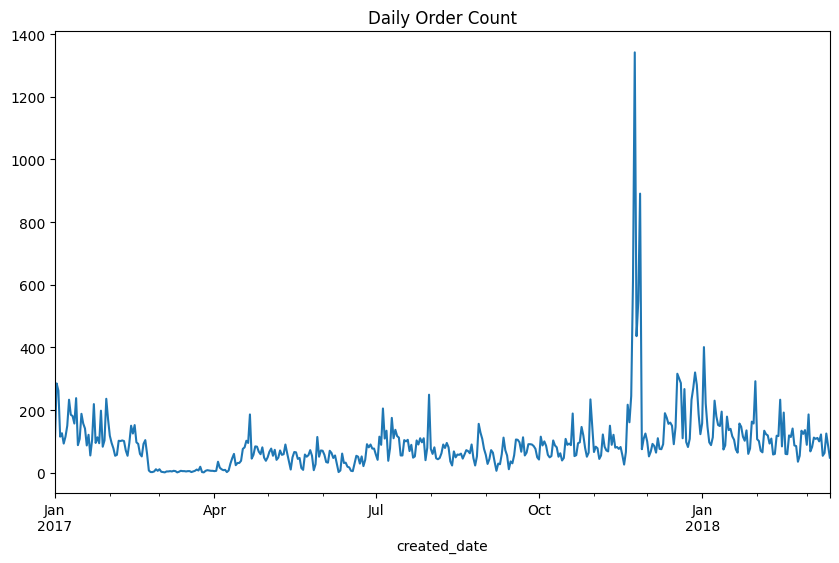

In [ ]:
# Resample orders by day based on the 'created_date' column
daily_order_counts = (
    orders_qu
    .resample("D", on="created_date")  # Resample by day ("D")
    ["order_id"]
    .count()  # Count number of orders per day
)

# Plot the daily order counts
daily_order_counts.plot(
    figsize=(10, 6),  # Set figure size
    title="Daily Order Count"
);

### Advanced Matplotlib example

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


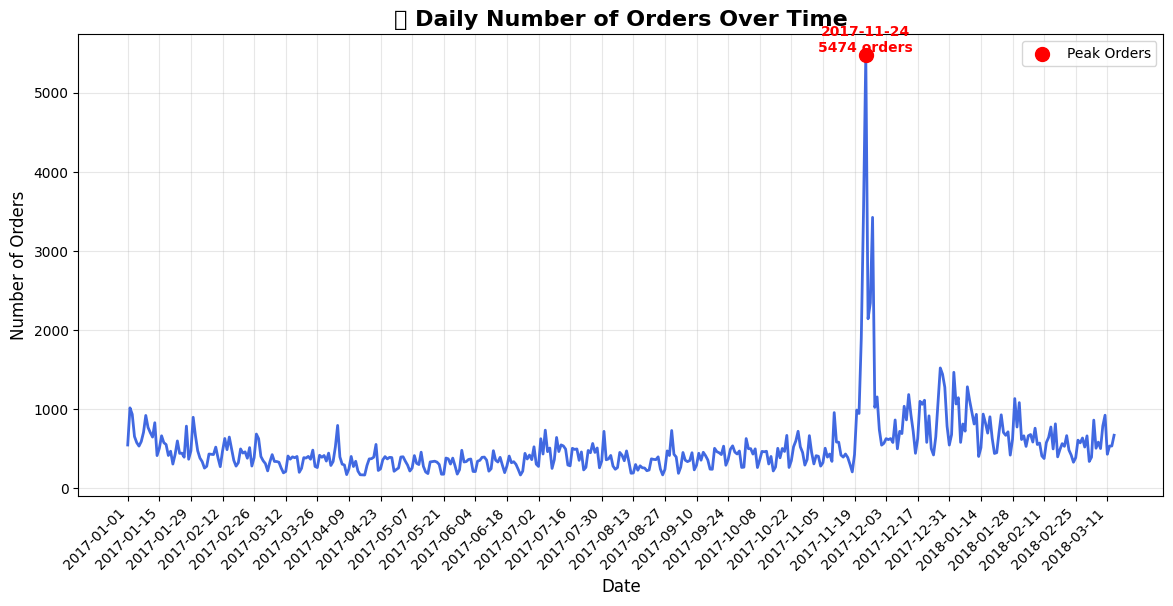

In [ ]:
import matplotlib.pyplot as plt

# Resample orders per day
daily_order_counts = (
    orders_cl
    .resample("D", on="created_date")["order_id"]
    .count()
)

# Find the date with the maximum number of orders
max_day = daily_order_counts.idxmax()
max_value = daily_order_counts.max()

# Create the plot
plt.figure(figsize=(14, 6))
plt.plot(daily_order_counts.index, daily_order_counts.values, color="royalblue", linewidth=2)

# Highlight the max point
plt.scatter(max_day, max_value, color='red', s=100, zorder=5, label='Peak Orders')
plt.text(max_day, max_value + 2, f"{max_day.date()}\n{max_value} orders",
         color='red', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Improve x-axis: show 1 tick per 2 weeks
plt.xticks(
    ticks=pd.date_range(start=daily_order_counts.index.min(),
                        end=daily_order_counts.index.max(),
                        freq="2W"),
    rotation=45,
    ha='right'
)

# Add titles and labels
plt.title("📦 Daily Number of Orders Over Time", fontsize=16, fontweight="bold")
plt.xlabel("Date", fontsize=12)
plt.ylabel("Number of Orders", fontsize=12)

# Add grid for better readability
plt.grid(alpha=0.3)

# Show legend
plt.legend()

plt.show();

## Calculate discounts

In [ ]:
# Create df with discounts:
ol_o_df = orderlines_qu.merge(products_qu[['sku','price']], on='sku', how='inner')
ol_o_df['Discounts'] = ol_o_df['price'] - ol_o_df['unit_price']
ol_o_df['Discounts %'] = ((ol_o_df['price'] - ol_o_df['unit_price']) / ol_o_df['price'] * 100).round(2)
discounts = ol_o_df[['sku','Discounts', 'Discounts %']]
discounts

,sku,Discounts,Discounts %
0,OWC0100,13.50,22.13
1,IOT0014,3.96,17.25
2,APP0700,16.81,18.89
3,CRU0039-A,16.09,20.90
4,PEB0015,157.50,52.50
...,...,...,...
53226,APP0698,15.01,60.04
53227,APP0698,15.01,60.04
53228,APP0698,15.01,60.04
53229,APP0698,15.01,60.04


### Average *Discount* per product

In [ ]:
discounts_sku = discounts.groupby('sku').mean()
discounts_sku

,Discounts,Discounts %
sku,,
8MO0001-A,22.04,62.97
8MO0003-A,22.15,63.29
8MO0007,12.72,36.36
8MO0008,13.41,38.32
8MO0009,17.53,50.08
...,...,...
ZAG0040,13.00,32.51
ZAG0041,10.00,33.34
ZAG0042,10.00,33.34


### Average discount overall

In [ ]:
discounts_sku[['Discounts', 'Discounts %']].mean()

,0
Discounts,36.25
Discounts %,21.13


### Products with highest discounts

In [ ]:
ol_o_df.groupby('sku')['Discounts %'].agg(['mean','max', 'min']).sort_values('max', ascending=False).head(20)

,mean,max,min
sku,,,
MOP0109,88.52,97.14,61.42
MOP0106,89.42,94.45,88.89
MOP0105,89.10,94.45,88.89
MOP0108,89.44,94.30,88.58
MOP0107,89.77,94.30,88.58
WDT0135-A,22.89,90.82,15.19
GRT0465,82.42,87.26,66.69
GRT0464,82.76,87.26,66.69
NTE0039-A,83.86,87.05,75.42


### Products with lowest discounts

In [ ]:
ol_o_df.groupby('sku')['Discounts %'].agg(['mean','max', 'min']).sort_values('max', ascending=False).tail(20)

,mean,max,min
sku,,,
KIN0125-4,-24.60,-9.59,-45.85
SAN0069,-9.68,-9.68,-9.68
APP1087,-9.97,-9.97,-9.97
KIN0144,-11.12,-11.12,-11.12
KIN0115,-13.34,-13.34,-13.34
REP0134,-27.78,-16.67,-50.01
REP0207,-16.67,-16.67,-16.67
IFX0077,-17.24,-17.24,-17.24
APP1186,-17.36,-17.36,-17.36


## Investigation of Investor statement

### Revenue by quarter

<ipython-input-163-f1561a6940b6>:4: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly_revenue = orderlines_qu.resample("Q", on="date")["revenue"].sum()


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '2017Q1'),
  Text(1, 0, '2017Q2'),
  Text(2, 0, '2017Q3'),
  Text(3, 0, '2017Q4'),
  Text(4, 0, '2018Q1')])

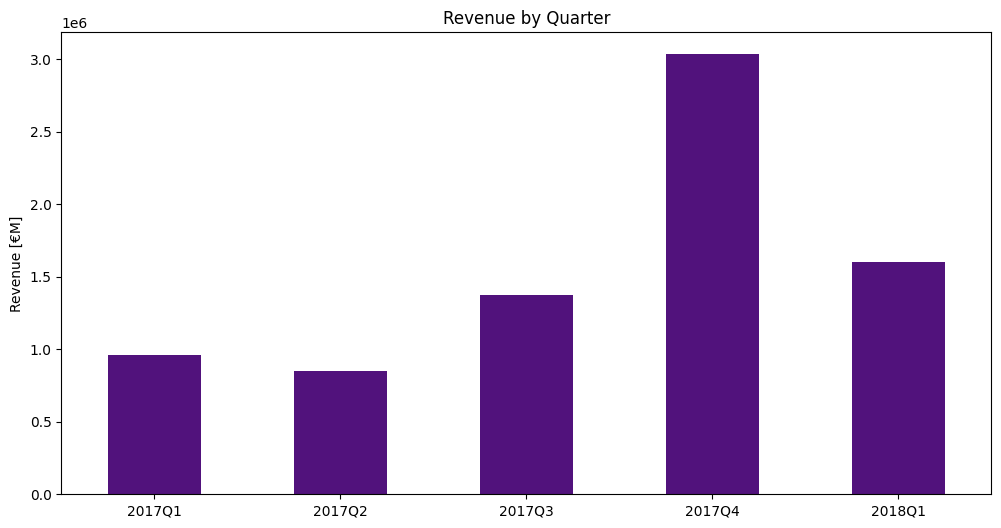

In [ ]:
intense_violet = "#51127C"

# Resample and group data by quarter, summing the revenue
quarterly_revenue = orderlines_qu.resample("Q", on="date")["revenue"].sum()

# Convert the date index to period to show quarter names on x-axis
quarterly_revenue.index = quarterly_revenue.index.to_period('Q')

# Plotting the bar chart
quarterly_revenue.plot.bar(
    title='Revenue by Quarter',
    ylabel='Revenue [€M]',
    xlabel='',
    color=[intense_violet, intense_violet, intense_violet, intense_violet, intense_violet],   # Replace with the actual color you want
    figsize=(12,6)
)

plt.xticks(rotation=0)

The LMS mentiones that investors complained about decreasing revenue in the last quarter. First of all we don't have complete data for the last quarter (Q1 2018). The data set ends on march 14th of 2018. When we compare Q1 2018 to Q4 2017 we see indeed a decrease in revenue. Consumer behavior is strongly influenced by holidays like black Friday and Christmas, why comparing quarterly results on a yearly basis makes more sense. Comparing Q1 2017 and Q1 2018 we can see an increase in revenue even though the data for Q1 2018 is missing half a month. Revenue increased from 1.05 M€ to 1.68 M€ which is an increase of 37,5%.

### order volume by quarter

<ipython-input-165-3844ef1c5d8e>:4: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly_orders = orderlines_qu.resample("Q", on="date")["id_order"].sum()


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '2017Q1'),
  Text(1, 0, '2017Q2'),
  Text(2, 0, '2017Q3'),
  Text(3, 0, '2017Q4'),
  Text(4, 0, '2018Q1')])

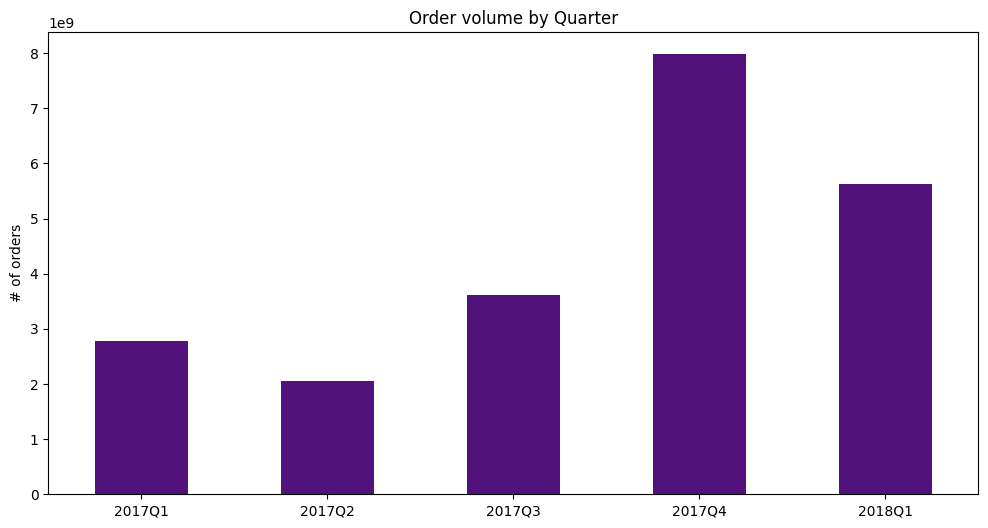

In [ ]:
intense_violet = "#51127C"

# Resample and group data by quarter, summing the revenue
quarterly_orders = orderlines_qu.resample("Q", on="date")["id_order"].sum()

# Convert the date index to period to show quarter names on x-axis
quarterly_orders.index = quarterly_orders.index.to_period('Q')

# Plotting the bar chart
quarterly_orders.plot.bar(
    title='Order volume by Quarter',
    ylabel='# of orders',
    xlabel='',
    color=[intense_violet, intense_violet, intense_violet, intense_violet, intense_violet],   # Replace with the actual color you want
    figsize=(12,6)
)

plt.xticks(rotation=0)

Comparing Q1 2018 to Q1 2017 orders have gone up from 6805 to 8796 which is an increase of about 23%. This only considers orders that are completed!

## Creation of Categories

### Adding product category column using 'type'

In [ ]:
# create copy products_qu
product_category_df = products_qu.copy()

In [ ]:
product_category_df["category"] = ""
# Racheal
product_category_df.loc[product_category_df["type"] == '11865403', "category"] += "Case"
product_category_df.loc[product_category_df["type"] == '12175397', "category"] += "Server"
product_category_df.loc[product_category_df["type"] == '1298', "category"] += "Accessory"
product_category_df.loc[product_category_df["type"] == '11935397', "category"] += "External Memory"
product_category_df.loc[product_category_df["type"] == '11905404', "category"] += "Accessory"
product_category_df.loc[product_category_df["type"] == '1282', "category"] += "MacBook & iMac"
product_category_df.loc[product_category_df["type"] == '12635403', "category"] += "Case"
product_category_df.loc[product_category_df["type"] == '13835403', "category"] += "Case"
product_category_df.loc[product_category_df["type"] == '5,74E+15', "category"] += "MacBook & iMac"
product_category_df.loc[product_category_df["type"] == '1364 ', "category"] += "Server"
# Pedro
product_category_df.loc[product_category_df["type"] == '12585395', "category"] = "Adapter"
product_category_df.loc[product_category_df["type"] == '1296', "category"] = "Monitor"
product_category_df.loc[product_category_df["type"] == '1325', "category"] = "Cable"
product_category_df.loc[product_category_df["type"] == '5384', "category"] = "Headphone"
product_category_df.loc[product_category_df["type"] == '1433', "category"] = "External Memory"
product_category_df.loc[product_category_df["type"] == '12215397', "category"] = "External Memory"
product_category_df.loc[product_category_df["type"] == '5398', "category"] = "Speaker"
product_category_df.loc[product_category_df["type"] == '1,02E+12', "category"] = "MacBook & iMac"
product_category_df.loc[product_category_df["type"] == '1,44E+11', "category"] = "Reparation"
product_category_df.loc[product_category_df["type"] == '57445397', "category"] = "Memory Card"
# Jens
product_category_df.loc[product_category_df["type"] == '1334', "category"] += "Accessory"
product_category_df.loc[product_category_df["type"] == '2158', "category"] += "MacBook & iMac"
product_category_df.loc[product_category_df["type"] == '2449', "category"] += "Apple Watch Strap"
product_category_df.loc[product_category_df["type"] == '12655397', "category"] += "External Memory"
product_category_df.loc[product_category_df["type"] == '1229', "category"] += "Digital Pen"
product_category_df.loc[product_category_df["type"] == '12995397', "category"] += "External Dock/Box"
product_category_df.loc[product_category_df["type"] == '1515', "category"] += "External Battery"
product_category_df.loc[product_category_df["type"] == '13615399', "category"] += "Charger"
product_category_df.loc[product_category_df["type"] == '13555403', "category"] += "Screen Protector"
product_category_df.loc[product_category_df["type"] == '1405', "category"] += "Graphic Tablet"
# Rest
product_category_df.loc[product_category_df["type"] == '1230', "category"] += "Cable"
product_category_df.loc[product_category_df["type"] == '118692158', "category"] += "MacBook & iMac"
product_category_df.loc[product_category_df["type"] == '1216', "category"] += "Stand/Support"
product_category_df.loc[product_category_df["category"] == '', "category"] = "Other"
product_category_df['category'].value_counts()

,count
category,
Other,2162
Case,1688
Accessory,1352
External Memory,1008
Server,939
MacBook & iMac,929
Cable,256
Adapter,190
Monitor,187


### Adding the brand to products

In [ ]:
# create copy brands_qu
brands_df = brands_qu.copy()

#### Merge Products with brands to create brand column

In [ ]:
# craeate 'Prefix' column on products
product_category_df['Prefix'] = product_category_df['sku'].str[:3]

# merge products and brands and add the column with brand names
prodcts_brands_df = product_category_df.merge(brands_df[['short','long']], left_on='Prefix', right_on='short', how='left').drop('short', axis=1)

# rename column with brand names to 'Brand'
prodcts_brands_df.rename(columns={'long': 'Brand'}, inplace=True)
prodcts_brands_df['Brand'].isnull().value_counts()
# --> there are NaN values in the 'Brand' column meaning the initial brand list is incomplete
# for most products the information about the brand can be gathered from the 'name' column

,count
Brand,
False,9806
True,186


#### Get missing brand names from 'name' column

In [ ]:
# get missing brand names from 'name' column
products_df_with_nan = prodcts_brands_df.loc[prodcts_brands_df['Brand'].isnull()]

# get the brand name from 'name' column and write it into the 'Brand' column (with a little help from ChatGPT ;))
def find_brand(row):
    desc_words = str(row['name']).split()  # split desc into words
    prefix = str(row['Prefix'])
    for word in desc_words:
        if prefix.lower() in word.lower():  # case-insensitive match
            return word  # return the first matching word
    return None  # or row['brand'] if you want to keep existing

products_df_with_nan['Brand'] = products_df_with_nan.apply(find_brand, axis=1)
products_df_with_nan['Brand'].isnull().value_counts()
# 23 products remain without Brand name

<ipython-input-122-db3ff7d1276b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  products_df_with_nan['Brand'] = products_df_with_nan.apply(find_brand, axis=1)


,count
Brand,
False,163
True,23


In [ ]:
# checking the 23 remaining products, where we don't have Brand information yet
products_df_with_nan.loc[products_df_with_nan['Brand'].isnull()]
# for some products there is still the brand information in the 'name' column. It just could't be found with the prefix.

,sku,name,desc,price,in_stock,type,category,Prefix,Brand
27,OND0069,Adapter mini DVI to HDMI,Adapter mini DVI to HDMI for Mac and PC,16.49,0,1325,Cable,OND,None
30,OND0073,Mini DisplayPort to HDMI Cable 18m,Cable with Mini DisplayPort to HDMI (audio + v...,22.99,0,1325,Cable,OND,None
349,HSQ0011,H-Squared Air Mount for Airport Express 2012,Support for 2nd generation AirPort Express.,39.99,0,12355400,Other,HSQ,None
1201,TRC0009,Motion monitor activity tractive,Monitor activity monitoring your pet.,79.99,0,11905404,Accessory,TRC,None
1834,TN10018-A,(Open) Ten One Pogo Connect Bluetooth 4.0 Poin...,Bluetooth Stylus iPhone iPad and iPod.,79.95,0,1298,Accessory,TN1,None
1960,OND0067-A,(Open) Cable mini DisplayPort to HDMI 18m,Cable Mini DisplayPort to HDMI (audio + video).,22.99,0,1298,Accessory,OND,None
1961,DRB0012-A,(Open) Dr Bott Digital Video Link DVI to Mini ...,DVI to Mini DisplayPort Converter for 27-inch ...,118.00,0,1298,Accessory,DRB,None
2239,HYN0007,Mac memory DIMM DDR3 1066MHz 8GB FCM,Mac Pro 8GB RAM (2009/10).,74.99,0,1364,Other,HYN,None
3507,MRL0009,Marley Chant Mini Wireless Speaker Green,Bluetooth small with protective canvas for iPh...,59.99,0,5398,Speaker,MRL,None
3534,MRL0007,Get Together Midnight Marley Wood Speaker,Wood wireless speaker power 20W iPhone iPad iPod.,169.00,0,5398,Speaker,MRL,None


In [ ]:
# adding the remaining brand names and grouping products without brand information as 'Other'
def fill_brand(row):
    if row['Brand'] is not None and not pd.isna(row['Brand']):
        return row['Brand']
    elif row['Prefix'] == 'HSQ':
        return 'H-Squared'
    elif row['Prefix'] == 'TN1':
        return 'Ten One'
    elif row['Prefix'] == 'DRB':
        return 'Dr Bott'
    elif row['Prefix'] == 'MRL':
        return 'Marley'
    elif row['Prefix'] == 'CAB':
        return 'Caliber'
    elif row['Prefix'] == 'PAE':
        return 'Palette'
    elif row['Prefix'] == 'DIN':
        return 'Disney'
    elif row['Prefix'] == 'BLE':
        return 'BlueSmart'
    elif row['Prefix'] == 'BAS':
        return 'Apple'
    elif row['Prefix'] == 'SMR':
        return 'SmartHalo'
    elif row['Prefix'] == 'NON':
        return 'Yoko Ono'
    elif row['Brand'] == None:
        return 'Other'
    else:
        pass

products_df_with_nan['Brand'] = products_df_with_nan.apply(fill_brand, axis=1)
products_df_with_nan.loc[products_df_with_nan['Brand'] == 'Other']
# only 5 products left without Brand information

<ipython-input-124-3a9bb98a2ecf>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  products_df_with_nan['Brand'] = products_df_with_nan.apply(fill_brand, axis=1)


,sku,name,desc,price,in_stock,type,category,Prefix,Brand
27,OND0069,Adapter mini DVI to HDMI,Adapter mini DVI to HDMI for Mac and PC,16.49,0,1325,Cable,OND,Other
30,OND0073,Mini DisplayPort to HDMI Cable 18m,Cable with Mini DisplayPort to HDMI (audio + v...,22.99,0,1325,Cable,OND,Other
1201,TRC0009,Motion monitor activity tractive,Monitor activity monitoring your pet.,79.99,0,11905404,Accessory,TRC,Other
1960,OND0067-A,(Open) Cable mini DisplayPort to HDMI 18m,Cable Mini DisplayPort to HDMI (audio + video).,22.99,0,1298,Accessory,OND,Other
2239,HYN0007,Mac memory DIMM DDR3 1066MHz 8GB FCM,Mac Pro 8GB RAM (2009/10).,74.99,0,1364,Other,HYN,Other


#### updating the information in the brands list

In [ ]:
missing_brands = products_df_with_nan[['Prefix','Brand']].drop_duplicates()
brands_df.rename(columns={'short':'Prefix','long':'Brand'}, inplace=True)
brands_final = pd.concat([brands_df, missing_brands], axis=0, ignore_index=True)
# I saved the updated brands file
# brands_final.to_csv(r'YOUR PATH\brands_final.csv', index=False)

#### adding complete brand information to products

In [ ]:
product_category_df_final = product_category_df.merge(brands_final[['Prefix','Brand']], on='Prefix', how='left')
# I saved the updated products file
# product_category_df_final.to_csv(r'YOUR PATH\product_category_df_final.csv', index=False)

What is the distribution of product prices across different categories? → Racheal

In [ ]:
# Average price for each category
average_price_Other =product_category_df[product_category_df['category'] == 'Other'].agg(average_price_Other =('price', 'mean')) # 	496.05
average_price_Accessory =product_category_df[product_category_df['category'] == 'Accessory'].agg(average_price_Accessory=('price', 'mean')) #188.18
average_price_case =product_category_df[product_category_df['category'] == 'Case'].agg(average_price_case=('price', 'mean')) #45.18
average_price_External_Memory =product_category_df[product_category_df['category'] == 'External Memory'].agg(average_price_External_Memory=('price', 'mean')) # 569.63
average_price_server =product_category_df[product_category_df['category'] == 'Server'].agg(average_price_server=('price', 'mean')) # 1203.41
average_price_MacBook_iMac =product_category_df[product_category_df['category'] == 'MacBook & iMac'].agg(average_price_MacBook_iMac=('price', 'mean')) # 3506.55
average_price_Cable =product_category_df[product_category_df['category'] == 'Cable'].agg(average_price_Cable=('price', 'mean')) #43.24
average_price_Adapter =product_category_df[product_category_df['category'] == 'Adapter'].agg(average_price_Adapter=('price', 'mean')) # 74.44
average_price_Monitor =product_category_df[product_category_df['category'] == 'Monitor'].agg(average_price_Monitor=('price', 'mean')) #512.68
average_price_Headphone =product_category_df[product_category_df['category'] == 'Headphone'].agg(average_price_Headphone=('price', 'mean')) #148.68
average_price_Speaker =product_category_df[product_category_df['category'] == 'Speaker'].agg(average_price_Speaker=('price', 'mean')) # 190.82
average_price_Memory_Card =product_category_df[product_category_df['category'] == 'Memory Card'].agg(average_price_Memory_Card=('price', 'mean')) #49.80
average_price_Reparation =product_category_df[product_category_df['category'] == 'Reparation'].agg(average_price_Reparation=('price', 'mean')) #79.75
average_price_Apple_Watch_Strap =product_category_df[product_category_df['category'] == 'Apple Watch Strap'].agg(average_price_Apple_Watch_Strap=('price', 'mean')) #61.41
average_price_Digital_Pen =product_category_df[product_category_df['category'] == 'Digital Pen'].agg(average_price_Digital_Pen=('price', 'mean')) #	50.32
average_price_External_Dock_Box =product_category_df[product_category_df['category'] == 'External Dock/Box'].agg(average_price_External_Dock_Box=('price', 'mean')) # 309.75
average_price_External_Battery =product_category_df[product_category_df['category'] == 'External Battery'].agg(average_price_External_Battery =('price', 'mean')) # 58.69
average_price_Charger =product_category_df[product_category_df['category'] == 'Charger'].agg(average_price_Charger =('price', 'mean')) #39.12
average_price_Graphic_Tablet =product_category_df[product_category_df['category'] == 'Graphic Tablet'].agg(average_price_Graphic_Tablet =('price', 'mean')) #661.61
average_price_Screen_Protector =product_category_df[product_category_df['category'] == 'Screen Protector'].agg(average_price_Screen_Protector =('price', 'mean')) #22.66
average_price_Stand_Support =product_category_df[product_category_df['category'] == 'Stand/Support'].agg(average_price_Stand_Support =('price', 'mean')) # 119.79


In [ ]:
# I created a dictionary for each category
 #I removed the categoy 'Other': 496.05,
category_avg_prices = {
    'Accessory': average_price_Accessory.values[0][0],
    'Case': average_price_case.values[0][0],
    'External Memory': average_price_External_Memory.values[0][0],
    'Server': average_price_server.values[0][0],
    'MacBook & iMac': average_price_MacBook_iMac.values[0][0],
    'Cable': average_price_Cable.values[0][0],
    'Adapter': average_price_Adapter.values[0][0],
    'Monitor': average_price_Monitor.values[0][0],
    'Headphone': average_price_Headphone.values[0][0],
    'Speaker': average_price_Speaker.values[0][0],
    'Memory Card': average_price_Memory_Card.values[0][0],
    'Reparation': average_price_Reparation.values[0][0],
    'Apple Watch Strap': average_price_Apple_Watch_Strap.values[0][0],
    'Digital Pen': average_price_Digital_Pen.values[0][0],
    'External Dock/Box': average_price_External_Dock_Box.values[0][0],
    'External Battery': average_price_External_Battery.values[0][0],
    'Charger': average_price_Charger.values[0][0],
    'Graphic Tablet': average_price_Graphic_Tablet.values[0][0],
    'Screen Protector': average_price_Screen_Protector.values[0][0],
    'Stand/Support': average_price_Stand_Support.values[0][0]
}

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

<ipython-input-130-804fe04b8f59>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= avg_price_df, x='Category', y='Average_Price', palette='magma')


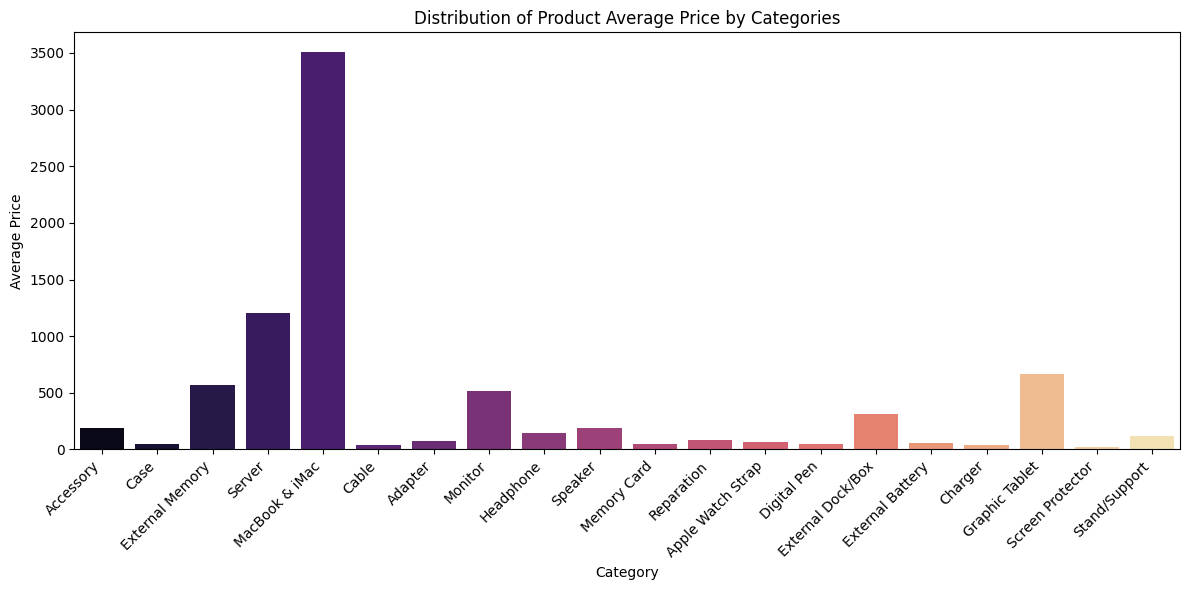

In [ ]:
# creating a dataframe for the category_avg_prices
avg_price_df = pd.DataFrame(list(category_avg_prices.items()), columns=['Category', 'Average_Price'])

# visualization
plt.figure(figsize=(12, 6))
sns.barplot(data= avg_price_df, x='Category', y='Average_Price', palette='magma')

plt.title('Distribution of Product Average Price by Categories')
plt.ylabel('Average Price')
plt.xlabel('Category')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show();

<ipython-input-131-100d6d75b38e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10_avg_price_df, x='Category', y='Average_Price', palette='magma')


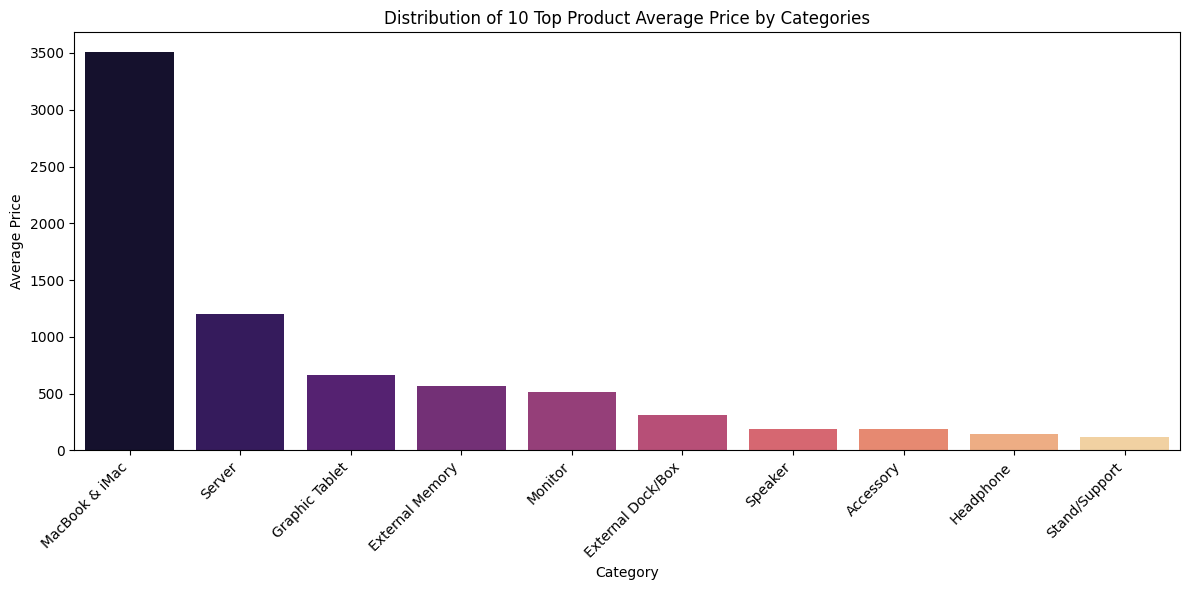

In [ ]:
# To fet the Average price of the top 10 categories
top10_avg_price_df = avg_price_df.sort_values(by='Average_Price', ascending=False).head(10)

#sns.violinplot(data=top10_avg_price_df, x='Category', y='Average_Price')
plt.figure(figsize=(12, 6))
sns.barplot(data=top10_avg_price_df, x='Category', y='Average_Price', palette='magma')

plt.title('Distribution of 10 Top Product Average Price by Categories')
plt.ylabel('Average Price')
plt.xlabel('Category')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show();

### How do seasonality and special dates (Christmas, Black Friday) affect sales?

In [ ]:
# Definition of special dates

styles = {
    'festivals': {'color': 'red', 'linestyle': '--'},
    'promotion': {'color': 'blue', 'linestyle': ':'}
}

kingsDay17 = pd.to_datetime('2017-01-06'), # Three kings day
valentine17 = pd.to_datetime('2017-02-14'), # Valentine's day
halloween = pd.to_datetime('2017-10-31'), # Halloween
blackFriday = pd.to_datetime('2017-11-24'), # Black Friday
cyberMonday = pd.to_datetime('2017-11-27'), # Cyber Monday
xmas = pd.to_datetime('2017-12-25'), # Christmas
newYear = pd.to_datetime('2017-12-31'), # New Year
kingsDay18 = pd.to_datetime('2018-01-06'), # Three kings day
blueMonday18 = pd.to_datetime('2018-01-15'), # Blue Monday - Saddest day of the year
valentine18 = pd.to_datetime('2018-02-14') # Valentine's day

# ammount of daily sales per product
daily_orders = orders_qu.resample("D", on="created_date")["order_id"].count()

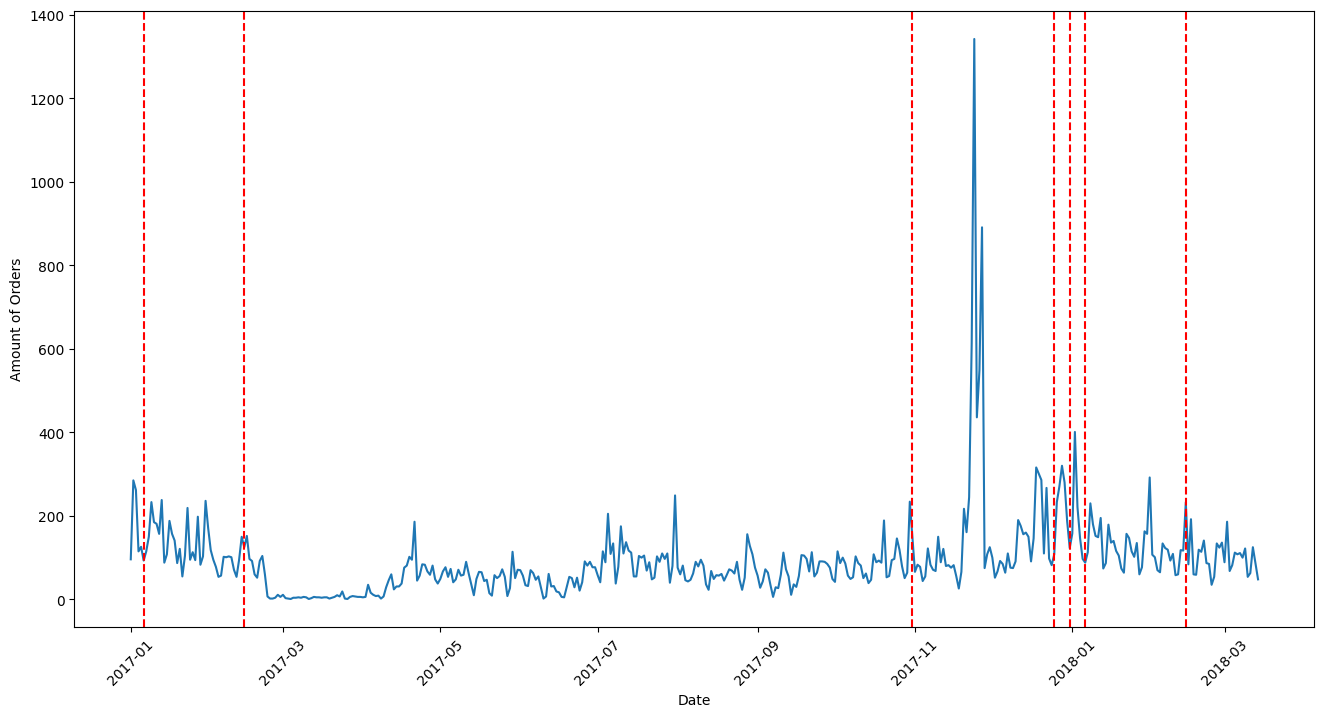

In [ ]:
plt.figure(figsize=(16,8))
sns.lineplot(
    data=daily_orders
    )

plt.axvline(kingsDay17, **styles['festivals'])
plt.axvline(valentine17, **styles['festivals'])
plt.axvline(halloween, **styles['festivals'])
plt.axvline(xmas, **styles['festivals'])
plt.axvline(newYear, **styles['festivals'])
plt.axvline(kingsDay18, **styles['festivals'])
plt.axvline(valentine18, **styles['festivals'])

plt.xticks(rotation = 45)
plt.xlabel('Date')
plt.ylabel('Amount of Orders')
plt.show();

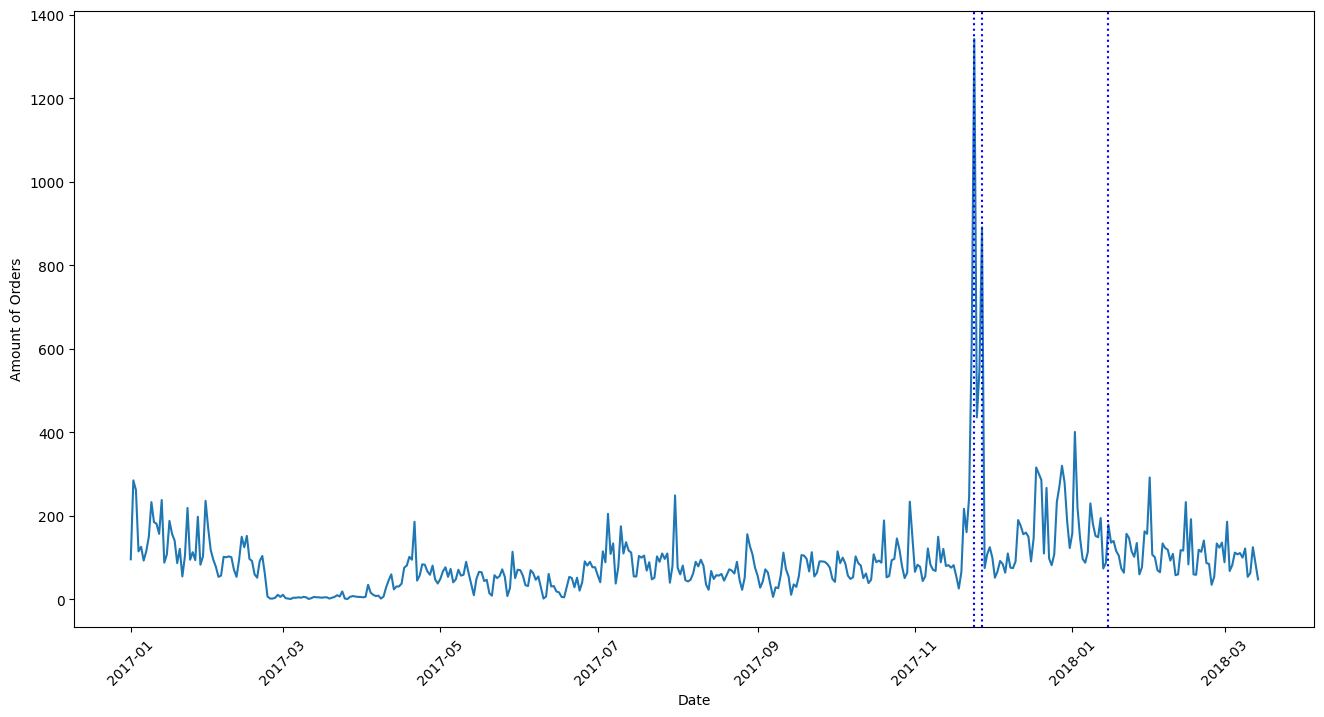

In [ ]:
plt.figure(figsize=(16,8))
sns.lineplot(
    data=daily_orders
    )

plt.axvline(blackFriday, **styles['promotion'])
plt.axvline(cyberMonday, **styles['promotion'])
plt.axvline(blueMonday18, **styles['promotion'])

plt.xticks(rotation = 45)
plt.xlabel('Date')
plt.ylabel('Amount of Orders')
plt.show();

### most sold products

In [ ]:
sales_count = orderlines_qu.groupby(orderlines_qu['sku'])['product_quantity'].sum()
most_selled = sales_count.nlargest(10)
most_selled.to_frame()
most_selled = most_selled.reset_index()
most_selled = most_selled.merge(product_category_df_final, how='left', on='sku')
most_selled

,sku,product_quantity,name,desc,price,in_stock,type,category,Prefix,Brand
0,APP1190,955,IPhone AppleCare Protection Plan,Apple Care extended warranty iPhone.,70.00,1,1231,Other,APP,Apple
1,APP0698,820,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,1,1230,Cable,APP,Apple
2,APP1922,537,AirPods Apple Bluetooth Headset for iPhone iPa...,Apple AirPods wireless headsets and cargo tran...,179.00,1,5384,Headphone,APP,Apple
3,APP0927,489,EarPods Apple Headphones with Remote and Mic (...,EarPods headphones Apple iPhone iPad and iPod ...,35.00,1,5384,Headphone,APP,Apple
4,WDT0183,476,"Red 4TB WD 35 ""Mac PC hard drive and NAS",Western Digital hard drive designed for NAS 4T...,169.00,1,12655397,External Memory,WDT,Western Digital
5,SAM0074,329,Samsung 850 EVO SSD Disk 500GB,SSD hard drive Mac and PC 25 inch 500GB SATA I...,179.99,1,12215397,External Memory,SAM,Samsung
6,CRU0051,328,Crucial MX300 525GB SSD Disk,SSD 525GB SATA Hard Disk 3.0 (6Gb / s) for Mac...,158.66,0,12215397,External Memory,CRU,Crucial
7,APP2446,270,Apple iPhone 6 32GB Space Gray,New iPhone 6 32GB Space Gray,449.33,0,21561716,Other,APP,Apple
8,NTE0013,252,"AdaptaDrive NewerTech adapter 2.5 ""to 3.5"" SATA",Adapter HDD / SSD 2.5 SATA 3.5 compatible with...,26.99,1,12755395,Other,NTE,NewerTech
9,CRU0050,248,Crucial MX300 275GB SSD Disk,SSD 275GB SATA Hard Disk 3.0 (6Gb / s) for Mac...,98.39,0,12215397,External Memory,CRU,Crucial


**Variation of total_revenue and discount_percent per category**

In [ ]:
#removing the other category
product_category_df = product_category_df[product_category_df['category'] != 'Other']
product_category_df['category'].value_counts()

,count
category,
Case,1688
Accessory,1352
External Memory,1008
Server,939
MacBook & iMac,929
Cable,256
Adapter,190
Monitor,187
Headphone,178


In [ ]:
# merging product category df with orderline
product_category_orderline_merge = product_category_df.merge(orderlines_qu, on='sku', how='inner')

In [ ]:
product_category_orderline_merge.copy = product_category_orderline_merge.copy()

In [ ]:
# creating discount and discount% column
product_category_orderline_merge.copy['Discount']= product_category_orderline_merge.copy['price'] - product_category_orderline_merge.copy['unit_price']
product_category_orderline_merge.copy['Discounts %'] = ((product_category_orderline_merge.copy['price'] - product_category_orderline_merge.copy['unit_price']) / product_category_orderline_merge.copy['price'] * 100).round(2)
#selecting important df from the many columns
discount_revenue_df =product_category_orderline_merge.copy[['Discount', 'Discounts %','category', 'revenue', 'unit_price', 'price', 'type','date' ]]

In [ ]:
discount_revenue_df.sample(5)

,Discount,Discounts %,category,revenue,unit_price,price,type,date
13174,55.00,61.12,Case,34.99,34.99,89.99,11865403,2017-06-30 11:55:39
32969,4.00,16.01,Accessory,20.99,20.99,24.99,11905404,2018-01-15 09:27:26
28845,38.00,17.43,External Dock/Box,179.99,179.99,217.99,12995397,2018-01-04 15:52:27
26097,3.01,6.69,Case,41.99,41.99,45.00,12635403,2017-04-18 10:17:35
21083,7.49,12.69,Cable,51.51,51.51,59.00,1325,2017-11-11 09:18:38


In [ ]:
# total_revenue_discount_per_category
total_revenue_discount_per_category = (
    product_category_orderline_merge.copy
    .groupby('category').agg(total_revenue_per_category=('revenue','sum'), total_discount_percent=('Discounts %','mean'))
    .reset_index()
)
total_revenue_discount_per_category

,category,total_revenue_per_category,total_discount_percent
0,Accessory,416451.09,22.86
1,Adapter,111748.33,22.98
2,Apple Watch Strap,12019.61,24.41
3,Cable,59038.02,32.19
4,Case,194887.88,31.04
5,Charger,33815.85,25.08
6,Digital Pen,45403.03,12.80
7,External Battery,16356.99,46.11
8,External Dock/Box,99304.11,23.33
9,External Memory,1735923.52,16.59


In [ ]:
#TEN TOP TOTAL REVENUE PER CATEGORY VS TOTAL_DISCOUNT_PERCENT
top10_total_revenue_discount_per_category= total_revenue_discount_per_category.sort_values(by='total_revenue_per_category', ascending=False).head(10)
top10_total_revenue_discount_per_category


,category,total_revenue_per_category,total_discount_percent
9,External Memory,1735923.52,16.59
14,Monitor,656947.12,11.76
17,Server,460434.85,7.83
0,Accessory,416451.09,22.86
11,Headphone,257855.65,28.82
10,Graphic Tablet,248143.27,21.50
4,Case,194887.88,31.04
18,Speaker,143835.08,21.45
12,MacBook & iMac,119037.83,17.69
1,Adapter,111748.33,22.98


<ipython-input-143-e3898de9e0ec>:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(top10_total_revenue_discount_per_category['category'], rotation=45, ha='right')


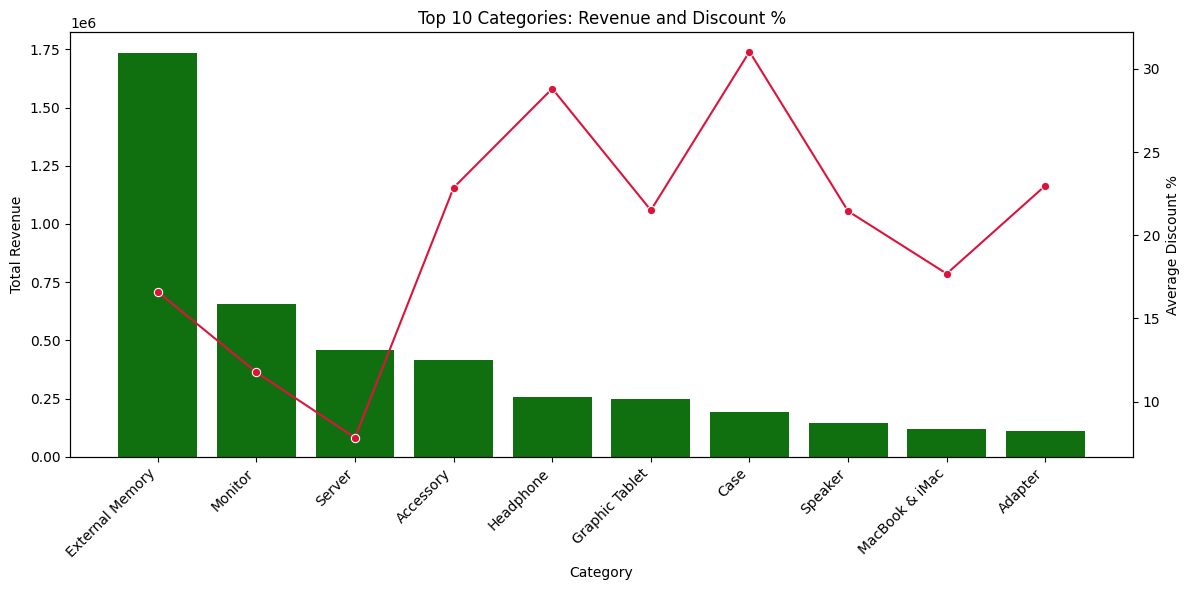

In [ ]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for revenue
sns.barplot(data=top10_total_revenue_discount_per_category,
            x='category', y='total_revenue_per_category', ax=ax1, color='green')

ax1.set_ylabel('Total Revenue', color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_xlabel('Category')
ax1.set_xticklabels(top10_total_revenue_discount_per_category['category'], rotation=45, ha='right')

# Line plot for discount % on second Y-axis
ax2 = ax1.twinx()
sns.lineplot(data=top10_total_revenue_discount_per_category,
             x='category', y='total_discount_percent', ax=ax2, color='crimson', marker='o')

ax2.set_ylabel('Average Discount %', color='black')
ax2.tick_params(axis='y', labelcolor='black')

plt.title('Top 10 Categories: Revenue and Discount %')
plt.tight_layout()
plt.show()

**EVOLUTION OF REVENUES FOR CATEGORIES OF PRODUCTS SOLD WITH AND WITHOUT DISCOUNTS**

In [ ]:
# CREATING A NEW COLUMN FOR DISCOUNTED PRODUCTS PER CATEGORY
product_category_orderline_merge.copy['Discounted'] = product_category_orderline_merge.copy['price'] > product_category_orderline_merge.copy['unit_price']

In [ ]:
# CREATING A NEW DATAFRAME WITH SELECTED COLUMNS FOR EASY CALCULATION OF DISCOUNTED PRODUCTS REVENUE PER CATEGORY
Discounted_No_Discount_df = product_category_orderline_merge.copy[['Discount','Discounts %','Discounted', 'category',  'revenue']]
Discounted_No_Discount_df['Discounted'].value_counts()

,count
Discounted,
True,32728
False,1712


In [ ]:
# CREATING DISCOUNTED PRODUCTS DATAFRAME  PER CATEGORY
Discounted_products = Discounted_No_Discount_df[Discounted_No_Discount_df['Discounted'] == True]
Discounted_products['Discounted'].value_counts()

,count
Discounted,
True,32728


In [ ]:
# CALCULATING THE TOTAL REVENUE OF DISCOUNTED PRODUCTS  PER CATEGORY
Discounted_products_revenue = Discounted_products.groupby(['category', 'Discounted']).agg(total_revenue_per_category=('revenue', 'sum')).reset_index()
Discounted_products_revenue

,category,Discounted,total_revenue_per_category
0,Accessory,True,392568.25
1,Adapter,True,107119.68
2,Apple Watch Strap,True,10187.85
3,Cable,True,56035.92
4,Case,True,183270.71
5,Charger,True,32185.18
6,Digital Pen,True,31056.94
7,External Battery,True,15857.04
8,External Dock/Box,True,94704.39
9,External Memory,True,1661633.49


In [ ]:
# TEN TOP Discounted_products_revenue  PER CATEGORY
Top_10_Discounted_products_revenue = Discounted_products_revenue.sort_values(by='total_revenue_per_category', ascending=False).head(10)
Top_10_Discounted_products_revenue

,category,Discounted,total_revenue_per_category
9,External Memory,True,1661633.49
14,Monitor,True,596589.29
17,Server,True,437342.34
0,Accessory,True,392568.25
10,Graphic Tablet,True,248044.27
11,Headphone,True,244840.71
4,Case,True,183270.71
18,Speaker,True,136753.51
12,MacBook & iMac,True,118547.84
1,Adapter,True,107119.68


In [ ]:
# CREATING NO_DISCOUNTED PRODUCTS DATAFRAME PER CATEGORY
No_Discounted_products = Discounted_No_Discount_df[Discounted_No_Discount_df['Discounted'] == False]
No_Discounted_products['Discounted'].value_counts()

,count
Discounted,
False,1712


In [ ]:
# CALCULATING THE TOTAL REVENUE OF No_DISCOUNTED PRODUCTS PER CATEGORY
No_Discounted_products_revenue = No_Discounted_products.groupby(['category', 'Discounted']).agg(total_revenue_per_category=('revenue', 'sum')).reset_index()
No_Discounted_products_revenue

,category,Discounted,total_revenue_per_category
0,Accessory,False,23882.84
1,Adapter,False,4628.65
2,Apple Watch Strap,False,1831.76
3,Cable,False,3002.10
4,Case,False,11617.17
5,Charger,False,1630.67
6,Digital Pen,False,14346.09
7,External Battery,False,499.95
8,External Dock/Box,False,4599.72
9,External Memory,False,74290.03


In [ ]:
# TEN TOP No_Discounted_products_revenue PER CATEGORY
Top_10_No_Discounted_products_revenue = No_Discounted_products_revenue.sort_values(by='total_revenue_per_category', ascending=False).head(10)
Top_10_No_Discounted_products_revenue

,category,Discounted,total_revenue_per_category
9,External Memory,False,74290.03
14,Monitor,False,60357.83
0,Accessory,False,23882.84
17,Server,False,23092.51
6,Digital Pen,False,14346.09
11,Headphone,False,13014.94
4,Case,False,11617.17
18,Speaker,False,7081.57
15,Reparation,False,6455.32
1,Adapter,False,4628.65


<ipython-input-152-52414dab936f>:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(discounted['category'], rotation=45, ha='right')


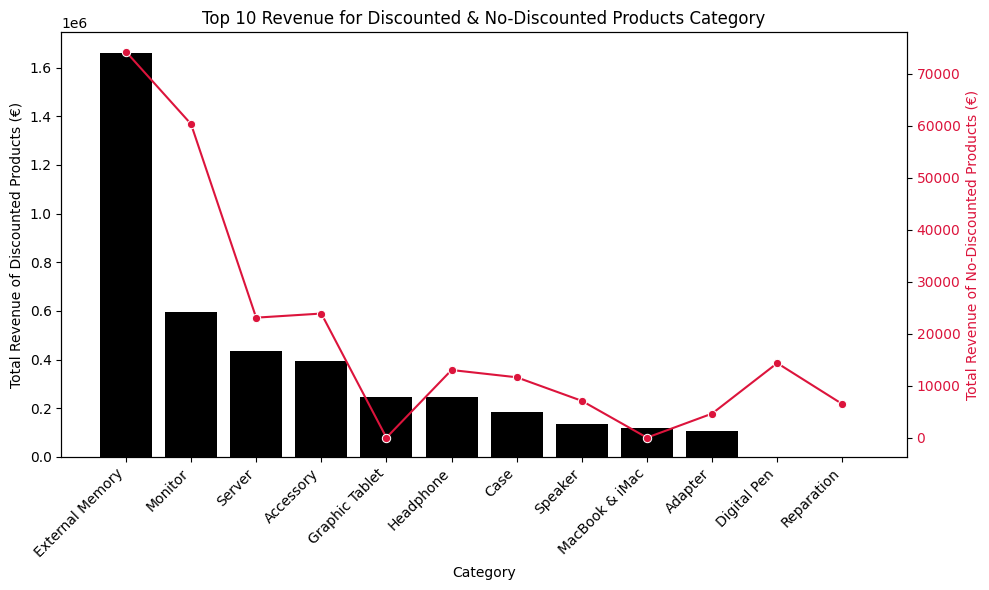

In [ ]:
#  Revenue for TEN TOP PRODUCTS CATEGORY WHEN Discounted & No-Discounted

# Step 1: Create a combined list of all unique categories
all_categories = list(set(Top_10_Discounted_products_revenue['category']) | set(Top_10_No_Discounted_products_revenue['category']))

# Step 2: Reindex both dataframes to have the same categories
discounted = Top_10_Discounted_products_revenue.set_index('category').reindex(all_categories, fill_value=0).reset_index().sort_values(by= 'total_revenue_per_category', ascending=False)
no_discounted = Top_10_No_Discounted_products_revenue.set_index('category').reindex(all_categories, fill_value=0).reset_index().sort_values(by= 'total_revenue_per_category', ascending=False)

# Step 3: Now plot
fig, ax1 = plt.subplots(figsize=(10,6))

# Bar plot for discounted products
sns.barplot(data=discounted,
            x='category', y='total_revenue_per_category', ax=ax1, color='black')

ax1.set_ylabel('Total Revenue of Discounted Products (€)', color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_xlabel('Category')
ax1.set_xticklabels(discounted['category'], rotation=45, ha='right')

# Line plot for non-discounted products on second Y-axis
ax2 = ax1.twinx()
sns.lineplot(data=no_discounted,
             x='category', y='total_revenue_per_category', ax=ax2, color='crimson', marker='o')

ax2.set_ylabel('Total Revenue of No-Discounted Products (€)', color='crimson')
ax2.tick_params(axis='y', labelcolor='crimson')

plt.title('Top 10 Revenue for Discounted & No-Discounted Products Category')
plt.tight_layout()
plt.show()

From the above graphs most of the products category were discounted at one point or the other, and it was observed that Discount actually affected revenue, when the products where on discount, there was a general increase in revenue in million, however without discounts the revenue was really poor in thousand.

### Discount and Revenue relation

#### Time frame of entire sata set

In [ ]:
# merge orderlines and products and create columns for Discouts, Discounts in percent and revenue
ol_p_df = orderlines_qu.merge(product_category_df_final[['sku','price','category','Brand']], on='sku', how='inner')
ol_p_df['Discounts'] = ol_p_df['price'] - ol_p_df['unit_price']
ol_p_df['Discounts %'] = ((ol_p_df['price'] - ol_p_df['unit_price']) / ol_p_df['price'] * 100).round(2)
ol_p_df['revenue'] = ol_p_df['unit_price'] * ol_p_df['product_quantity']

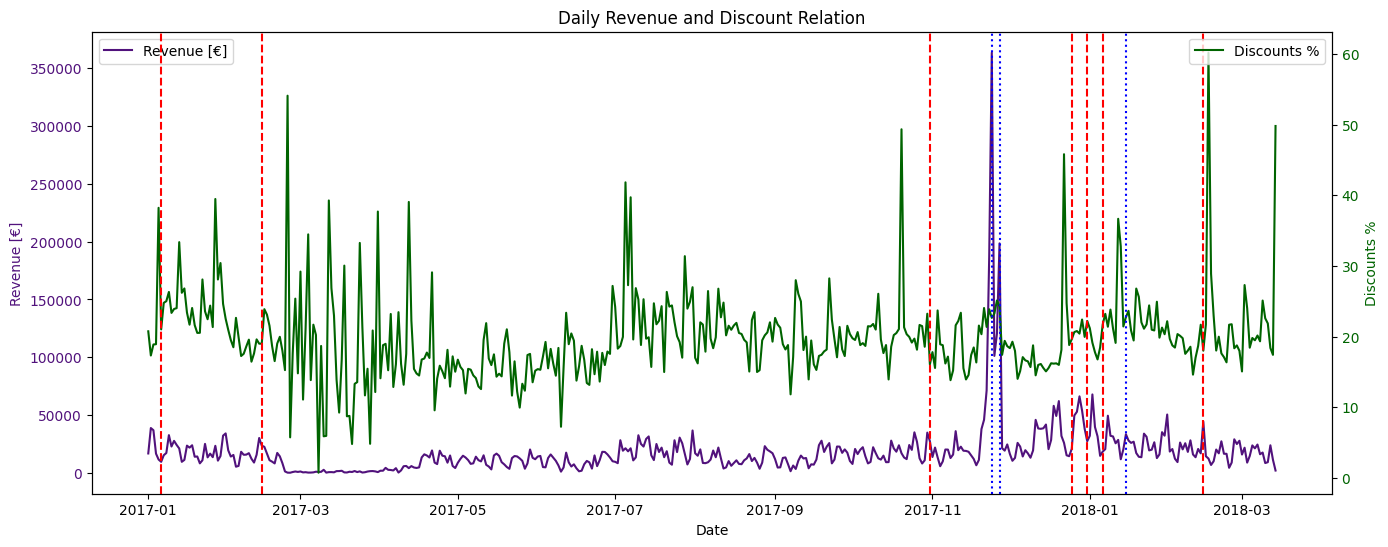

In [ ]:
# selection of colors from Magma palette
deep_dark = "#000004"
dark_pruple = "#1C1044"
intense_violet = "#51127C"
fucsia_magenta = "#B63679"
coral_orange = "#FB8861"
gold_yellow = "#F9C932"
light_yellow = "#FCFDBF"
dark_green = "#006400"

# Resample by day: Calculate daily sum of revenue and daily average discount
daily_revenue = ol_p_df.resample("D", on="date")["revenue"].sum()
daily_discount = ol_p_df.resample("D", on="date")["Discounts %"].mean()

# Create the plot with two y-axes
fig, ax1 = plt.subplots(figsize=(16, 6))

# First line on primary y-axis (Sum of Revenue)
ax1.plot(daily_revenue.index, daily_revenue.values, color=intense_violet, label='Revenue [€]')
ax1.set_xlabel('Date')
ax1.set_ylabel('Revenue [€]', color=intense_violet)
ax1.tick_params(axis='y', labelcolor=intense_violet)

# Create second y-axis for Discounts
ax2 = ax1.twinx()
ax2.plot(daily_discount.index, daily_discount.values, color=dark_green, label='Discounts %')
ax2.set_ylabel('Discounts %', color=dark_green)
ax2.tick_params(axis='y', labelcolor=dark_green)

# Combine legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Set title
plt.title('Daily Revenue and Discount Relation')

# dashed lines for festivals and promotion days:
plt.axvline(kingsDay17, **styles['festivals'])#color='r', linestyle='--', linewidth=1.5)
plt.axvline(valentine17, **styles['festivals'])#color='r', linestyle='--', linewidth=1.5)
plt.axvline(halloween, **styles['festivals'])#color='r', linestyle='--', linewidth=1.5)
plt.axvline(blackFriday, **styles['promotion'])#color='r', linestyle='--', linewidth=1.5)
plt.axvline(cyberMonday, **styles['promotion'])#color='r', linestyle='--', linewidth=1.5)
plt.axvline(xmas, **styles['festivals'])#color='r', linestyle='--', linewidth=1.5)
plt.axvline(newYear, **styles['festivals'])#color='r', linestyle='--', linewidth=1.5)
plt.axvline(kingsDay18, **styles['festivals'])#color='r', linestyle='--', linewidth=1.5)
plt.axvline(blueMonday18, **styles['promotion'])#color='r', linestyle='--', linewidth=1.5)
plt.axvline(valentine18, **styles['festivals'])#color='r', linestyle='--', linewidth=1.5)

# Show plot
plt.show()

#### Example of weekly revenue fluctuation (Jul & Aug 2017)

/usr/local/lib/python3.11/dist-packages/pandas/plotting/_matplotlib/core.py:975: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  return ax.plot(*args, **kwds)


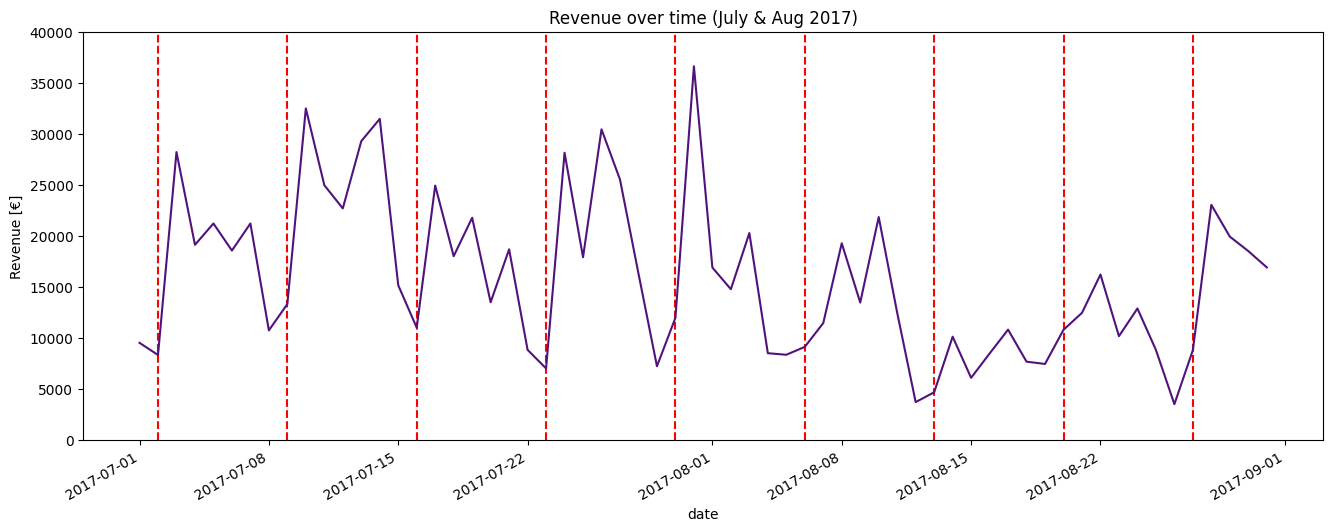

In [ ]:
first_Sun = pd.to_datetime('2017-07-02')
plt.axvline(first_Sun, **styles['festivals'])
sec_Sun = pd.to_datetime('2017-07-09')
plt.axvline(sec_Sun, **styles['festivals'])
thr_Sun = pd.to_datetime('2017-07-16')
plt.axvline(thr_Sun, **styles['festivals'])
fourth_Sun = pd.to_datetime('2017-07-23')
plt.axvline(fourth_Sun, **styles['festivals'])
fifth_Sun = pd.to_datetime('2017-07-30')
plt.axvline(fifth_Sun, **styles['festivals'])
six_Sun = pd.to_datetime('2017-08-06')
plt.axvline(six_Sun, **styles['festivals'])
sev_Sun = pd.to_datetime('2017-08-13')
plt.axvline(sev_Sun, **styles['festivals'])
eig_Sun = pd.to_datetime('2017-08-20')
plt.axvline(eig_Sun, **styles['festivals'])
nine_Sun = pd.to_datetime('2017-08-27')
plt.axvline(nine_Sun, **styles['festivals'])

# Filter data for Jul & Aug 2017
Jul_Aug_2017_data = ol_p_df[(ol_p_df['date'].dt.month.isin([7,8])) & (ol_p_df['date'].dt.year == 2017)]
# Resample the data by day and sum the revenue
Jul_Aug_2017_data.resample("D", on="date")["revenue"].sum().plot(kind='line', color=intense_violet, title='Revenue over time (July & Aug 2017)', ylabel='Revenue [€]', ylim=(0, 40000), figsize=(16,6));

#### Discount & Revenue Mar 2017

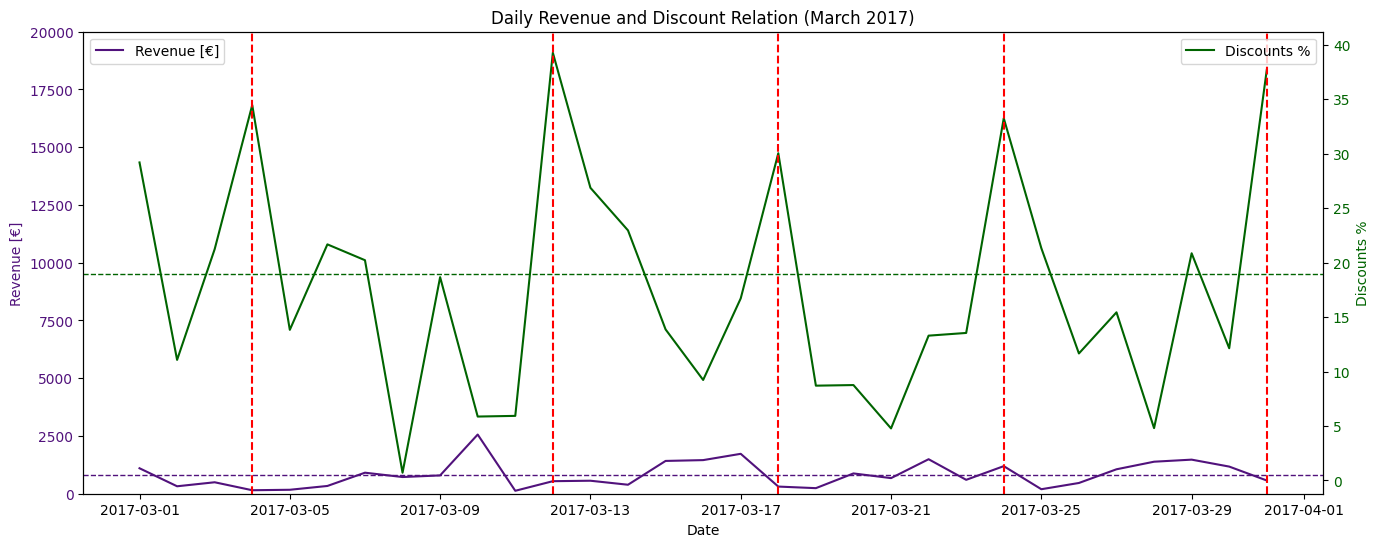

In [ ]:
# Resample by day: Calculate daily sum of revenue and daily average discount
march_2017_data = ol_p_df[(ol_p_df['date'].dt.month.isin([3])) & (ol_p_df['date'].dt.year == 2017)]
daily_revenue = march_2017_data.resample("D", on="date")["revenue"].sum()
daily_discount = march_2017_data.resample("D", on="date")["Discounts %"].mean()

# Create the plot with two y-axes
fig, ax1 = plt.subplots(figsize=(16, 6))

# First line on primary y-axis (Sum of Revenue)
ax1.plot(daily_revenue.index, daily_revenue.values, color=intense_violet, label='Revenue [€]')
ax1.set_xlabel('Date')
ax1.set_ylabel('Revenue [€]', color=intense_violet)
ax1.tick_params(axis='y', labelcolor=intense_violet)
ax1.set_ylim(0, 20000)

# dashed line for average revenue:
ave_rev_Ma = march_2017_data.resample("D", on="date")["revenue"].sum().mean()
plt.axhline(y=ave_rev_Ma, linestyle='--', color=intense_violet, linewidth=1)

# Create second y-axis for Discounts
ax2 = ax1.twinx()
ax2.plot(daily_discount.index, daily_discount.values, color=dark_green, label='Discounts %')
ax2.set_ylabel('Discounts %', color=dark_green)
ax2.tick_params(axis='y', labelcolor=dark_green)

# dashed line for average discount:
ave_dis_Ma = march_2017_data['Discounts %'].mean()
plt.axhline(y=ave_dis_Ma, linestyle='--', color=dark_green, linewidth=1)

# Combine legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Set title
plt.title('Daily Revenue and Discount Relation (March 2017)')

# dashed lines for days with highest discounts:
first_Sa = pd.to_datetime('2017-03-04')
plt.axvline(first_Sa, **styles['festivals'])#color='r', linestyle='--', linewidth=1.5)
sec_Su = pd.to_datetime('2017-03-12')
plt.axvline(sec_Su, **styles['festivals'])
thr_Sa = pd.to_datetime('2017-03-18')
plt.axvline(thr_Sa, **styles['festivals'])
fourth_Fr = pd.to_datetime('2017-03-24')
plt.axvline(fourth_Fr, **styles['festivals'])
fifth_Fr = pd.to_datetime('2017-03-31')
plt.axvline(fifth_Fr, **styles['festivals'])

# Show plot
plt.show()

#### Discount & Revenue May 2017

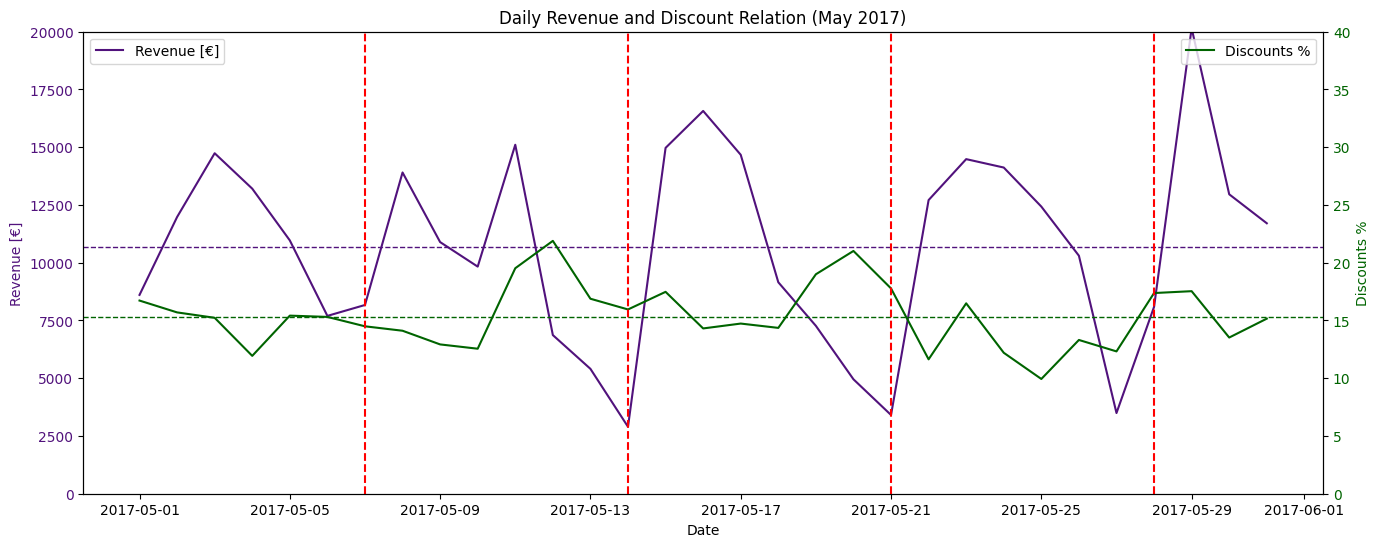

In [ ]:
# Resample by day: Calculate daily sum of revenue and daily average discount
may_2017_data = ol_p_df[(ol_p_df['date'].dt.month.isin([5])) & (ol_p_df['date'].dt.year == 2017)]
daily_revenue = may_2017_data.resample("D", on="date")["revenue"].sum()
daily_discount = may_2017_data.resample("D", on="date")["Discounts %"].mean()

# Create the plot with two y-axes
fig, ax1 = plt.subplots(figsize=(16, 6))

# First line on primary y-axis (Sum of Revenue)
ax1.plot(daily_revenue.index, daily_revenue.values, color=intense_violet, label='Revenue [€]')
ax1.set_xlabel('Date')
ax1.set_ylabel('Revenue [€]', color=intense_violet)
ax1.tick_params(axis='y', labelcolor=intense_violet)
ax1.set_ylim(0, 20000)

# dashed line for average revenue:
ave_rev_May = may_2017_data.resample("D", on="date")["revenue"].sum().mean()
plt.axhline(y=ave_rev_May, linestyle='--', color=intense_violet, linewidth=1)

# Create second y-axis for Discounts
ax2 = ax1.twinx()
ax2.plot(daily_discount.index, daily_discount.values, color=dark_green, label='Discounts %')
ax2.set_ylabel('Discounts %', color=dark_green)
ax2.tick_params(axis='y', labelcolor=dark_green)
ax2.set_ylim(0, 40)

# dashed line for average discount:
ave_dis_May = may_2017_data['Discounts %'].mean()
plt.axhline(y=ave_dis_May, linestyle='--', color=dark_green, linewidth=1)

# Combine legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Set title
plt.title('Daily Revenue and Discount Relation (May 2017)')

first_Sun = pd.to_datetime('2017-05-07')
plt.axvline(first_Sun, **styles['festivals'])#color='r', linestyle='--', linewidth=1.5)
sec_Sun = pd.to_datetime('2017-05-14')
plt.axvline(sec_Sun, **styles['festivals'])
thr_Sun = pd.to_datetime('2017-05-21')
plt.axvline(thr_Sun, **styles['festivals'])
fourth_Sun = pd.to_datetime('2017-05-28')
plt.axvline(fourth_Sun, **styles['festivals'])

# Show plot
plt.show()

#### Discount & Revenue Nov 2017

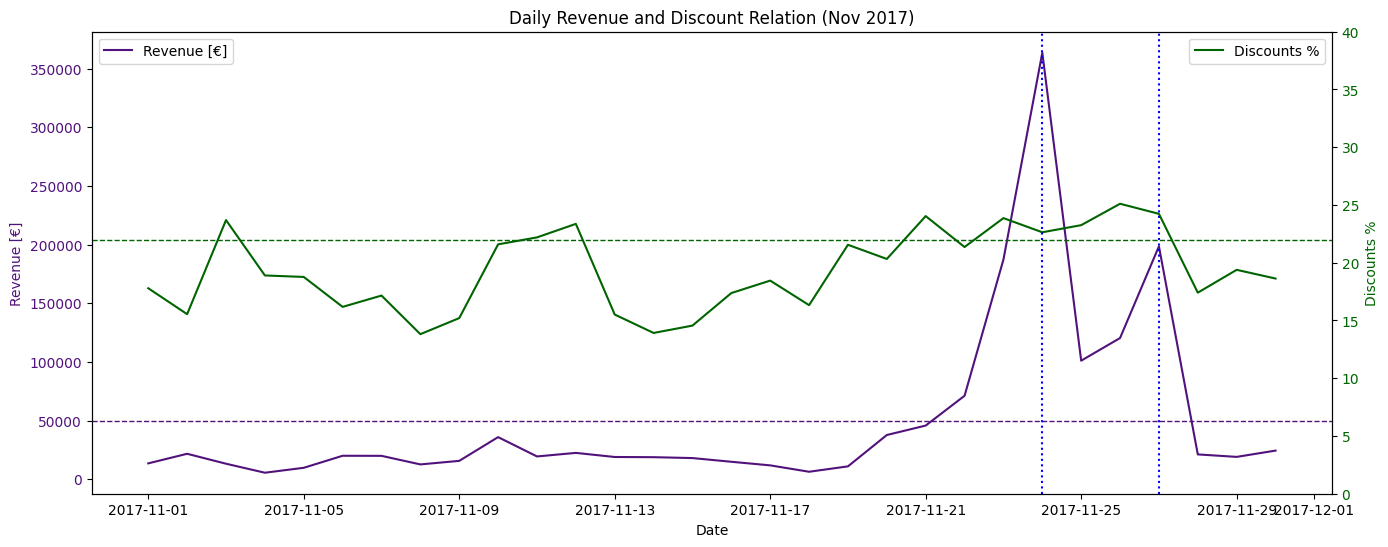

In [ ]:
# Resample by day: Calculate daily sum of revenue and daily average discount
nov_2017_data = ol_p_df[(ol_p_df['date'].dt.month.isin([11])) & (ol_p_df['date'].dt.year == 2017)]
daily_revenue = nov_2017_data.resample("D", on="date")["revenue"].sum()
daily_discount = nov_2017_data.resample("D", on="date")["Discounts %"].mean()

# Create the plot with two y-axes
fig, ax1 = plt.subplots(figsize=(16, 6))

# First line on primary y-axis (Sum of Revenue)
ax1.plot(daily_revenue.index, daily_revenue.values, color=intense_violet, label='Revenue [€]')
ax1.set_xlabel('Date')
ax1.set_ylabel('Revenue [€]', color=intense_violet)
ax1.tick_params(axis='y', labelcolor=intense_violet)

# dashed line for average revenue:
ave_rev_Nov = nov_2017_data.resample("D", on="date")["revenue"].sum().mean()
plt.axhline(y=ave_rev_Nov, linestyle='--', color=intense_violet, linewidth=1)

# Create second y-axis for Discounts
ax2 = ax1.twinx()
ax2.plot(daily_discount.index, daily_discount.values, color=dark_green, label='Discounts %')
ax2.set_ylabel('Discounts %', color=dark_green)
ax2.tick_params(axis='y', labelcolor=dark_green)
ax2.set_ylim(0, 40)

# dashed line for average discount:
ave_dis_Nov = nov_2017_data['Discounts %'].mean()
plt.axhline(y=ave_dis_Nov, linestyle='--', color=dark_green, linewidth=1)

# Combine legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Set title
plt.title('Daily Revenue and Discount Relation (Nov 2017)')

plt.axvline(blackFriday, **styles['promotion'])#color='r', linestyle='--', linewidth=1.5)
plt.axvline(cyberMonday, **styles['promotion'])#color='r', linestyle='--', linewidth=1.5)

# Show plot
plt.show()